# Capstone: Gold Price Prediction

## Import Library and Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.stattools import adfuller  
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from keras.layers import Dense, Dropout, GRU, LSTM

from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [3]:
# import data
gold_df = pd.read_csv('data/gold_price_usd.csv')
btc_usd_df = pd.read_csv('data/btc_usd_price.csv')
crude_oil_df = pd.read_csv('data/crude_oil.csv')
dowjones_df = pd.read_csv('data/dowjones_data.csv')
nasdaq_df = pd.read_csv('data/nasdaq_composite.csv')
sp500_df = pd.read_csv('data/sp500_data.csv')
xau_df = pd.read_csv('data/philadelphia_gold_silver.csv')
ff_df = pd.read_csv('data/FF.csv')
usd_thb_df = pd.read_csv('data/usdthb_close.csv')
usd_cny_df = pd.read_csv('data/usdcny_close.csv')
usd_aud_df = pd.read_csv('data/usdaud_close.csv')
usd_rub_df = pd.read_csv('data/usdrussia_close.csv')
unemployment_df = pd.read_csv('data/unemrate_us.csv')


In [4]:
print(gold_df.shape)
gold_df.head()

(2851, 6)


,Date,Price,Open,High,Low,Change %
0,12/13/2023,"1,980.01","1,982.57","1,982.57","1,979.60",0.03%
1,12/12/2023,"1,979.44","1,981.59","1,996.80","1,977.19",-0.09%
2,12/11/2023,"1,981.30","2,003.60","2,008.72","1,975.95",-1.10%
3,12/8/2023,"2,003.39","2,028.69","2,034.19","1,994.74",-1.23%
4,12/7/2023,"2,028.34","2,025.30","2,039.93","2,020.26",0.17%


In [5]:
print(btc_usd_df.shape)
btc_usd_df.head()

(2946, 2)


,Date,Close
0,11/19/2015 23:58:00,326.41
1,11/20/2015 23:58:00,322.39
2,11/21/2015 23:58:00,327.00
3,11/22/2015 23:58:00,323.71
4,11/23/2015 23:58:00,323.00


In [6]:
print(ff_df.shape)
ff_df.head()

(3622, 2)


,DATE,FF
0,1954-07-07,1.00
1,1954-07-14,1.22
2,1954-07-21,0.57
3,1954-07-28,0.63
4,1954-08-04,0.27


In [7]:
print(crude_oil_df.shape)
crude_oil_df.head()

(2883, 7)


,Date,Price,Open,High,Low,Vol.,Change %
0,2023-12-15,71.43,71.61,72.22,70.30,NaN,-0.21%
1,2023-12-14,71.58,69.85,72.46,69.54,275.69K,3.04%
2,2023-12-13,69.47,68.73,69.89,67.71,307.00K,1.25%
3,2023-12-12,68.61,71.43,71.96,68.22,324.53K,-3.80%
4,2023-12-11,71.32,71.15,71.81,70.35,274.41K,0.13%


In [8]:
print(dowjones_df.shape)
dowjones_df.head()

(2747, 6)


,Date,Open,High,Low,Close,Volume
0,1/2/2013 16:00:00,13104.30,13412.71,13104.30,13412.55,160562592
1,1/3/2013 16:00:00,13413.09,13430.54,13358.43,13391.36,128628632
2,1/4/2013 16:00:00,13391.20,13446.96,13376.23,13435.21,107137608
3,1/7/2013 16:00:00,13436.05,13436.05,13343.71,13384.29,112344784
4,1/8/2013 16:00:00,13377.34,13377.34,13293.20,13328.85,128735128


In [9]:
print(usd_thb_df.shape)
usd_thb_df.head()

(3943, 2)


,Date,Close
0,1/1/2013 23:58:00,30.536
1,1/2/2013 23:58:00,30.314
2,1/3/2013 23:58:00,30.392
3,1/4/2013 23:58:00,30.462
4,1/5/2013 23:58:00,29.750


In [10]:
print(usd_cny_df.shape)
usd_cny_df.head()

(3962, 2)


,Date,Close
0,1/1/2013 23:58:00,6.2376
1,1/2/2013 23:58:00,6.2332
2,1/3/2013 23:58:00,6.2325
3,1/4/2013 23:58:00,6.2306
4,1/5/2013 23:58:00,6.2304


In [11]:
print(usd_aud_df.shape)
usd_aud_df.head()

(3840, 2)


,Date,Close
0,1/1/2013 23:58:00,0.962279
1,1/2/2013 23:58:00,0.953471
2,1/3/2013 23:58:00,0.956846
3,1/4/2013 23:58:00,0.954381
4,1/5/2013 23:58:00,0.954654


In [12]:
print(usd_rub_df.shape)
usd_rub_df.head()

(3803, 2)


,Date,Close
0,1/1/2013 23:58:00,30.3372
1,1/2/2013 23:58:00,30.1576
2,1/3/2013 23:58:00,30.2788
3,1/4/2013 23:58:00,30.3390
4,1/5/2013 23:58:00,30.3380


In [13]:
print(nasdaq_df.shape)
nasdaq_df.head()

(2755, 2)


,Date,Close
0,1/2/2013 16:00:00,3112.26
1,1/3/2013 16:00:00,3100.57
2,1/4/2013 16:00:00,3101.66
3,1/7/2013 16:00:00,3098.81
4,1/8/2013 16:00:00,3091.81


In [14]:
print(sp500_df.shape)
sp500_df.head()

(2756, 2)


,Date,Close
0,1/1/2013 16:00:00,1426.19
1,1/2/2013 16:00:00,1462.42
2,1/3/2013 16:00:00,1459.37
3,1/4/2013 16:00:00,1466.47
4,1/7/2013 16:00:00,1461.89


In [15]:
print(xau_df.shape)
xau_df.head()

(2756, 6)


,Date,Price,Open,High,Low,Change %
0,12/12/2023,113.93,116.98,117.02,113.63,-2.67%
1,12/11/2023,117.05,116.35,117.18,115.19,-0.88%
2,12/8/2023,118.09,117.51,119.46,116.90,-1.19%
3,12/7/2023,119.51,120.25,120.38,118.57,-0.41%
4,12/6/2023,120.00,121.13,121.95,119.95,-0.07%


In [16]:
print(unemployment_df.shape)
unemployment_df.head()

(131, 2)


,DATE,UNRATE
0,2013-01-01,8.0
1,2013-02-01,7.7
2,2013-03-01,7.5
3,2013-04-01,7.6
4,2013-05-01,7.5


# Data Preprocessing

In [17]:
# Check null values
print(gold_df.isnull().sum())
print(btc_usd_df.isnull().sum())
print(crude_oil_df.isnull().sum())
print(dowjones_df.isnull().sum())
print(ff_df.isnull().sum())
print(usd_thb_df.isnull().sum())
print(usd_cny_df.isnull().sum())
print(usd_aud_df.isnull().sum())
print(usd_rub_df.isnull().sum())
print(nasdaq_df.isnull().sum())
print(sp500_df.isnull().sum())
print(xau_df.isnull().sum())
print(unemployment_df.isnull().sum())

Date        0
Price       0
Open        0
High        0
Low         0
Change %    0
dtype: int64
Date     0
Close    0
dtype: int64
Date          0
Price         0
Open          0
High          0
Low           0
Vol.        146
Change %      0
dtype: int64
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
DATE    0
FF      0
dtype: int64
Date     0
Close    0
dtype: int64
Date     0
Close    0
dtype: int64
Date     0
Close    0
dtype: int64
Date     0
Close    0
dtype: int64
Date     0
Close    0
dtype: int64
Date     0
Close    0
dtype: int64
Date        0
Price       0
Open        0
High        0
Low         0
Change %    0
dtype: int64
DATE      0
UNRATE    0
dtype: int64


## Change date data type and rename

In [18]:
gold_df.rename(columns={'Price':'gold_close'}, inplace=True)
gold_df.head()

,Date,gold_close,Open,High,Low,Change %
0,12/13/2023,"1,980.01","1,982.57","1,982.57","1,979.60",0.03%
1,12/12/2023,"1,979.44","1,981.59","1,996.80","1,977.19",-0.09%
2,12/11/2023,"1,981.30","2,003.60","2,008.72","1,975.95",-1.10%
3,12/8/2023,"2,003.39","2,028.69","2,034.19","1,994.74",-1.23%
4,12/7/2023,"2,028.34","2,025.30","2,039.93","2,020.26",0.17%


In [19]:
# Check data types and rename
if 'Date' in ff_df.columns:
    ff_df['Date'] = pd.to_datetime(ff_df['Date'], format='%Y-%m-%d')
ff_df.rename(columns={'DATE': 'Date'}, inplace=True)
ff_df.head()

,Date,FF
0,1954-07-07,1.00
1,1954-07-14,1.22
2,1954-07-21,0.57
3,1954-07-28,0.63
4,1954-08-04,0.27


In [20]:
# Rename columns
xau_df.rename(columns={'Close/Last': 'Close'}, inplace=True)

In [21]:
dowjones_df['Date'] = pd.to_datetime(dowjones_df['Date'], format='%m/%d/%Y %H:%M:%S')

In [22]:
# remove time from date
dowjones_df['Date'] = pd.to_datetime(dowjones_df['Date']).dt.date

In [23]:
dowjones_df.rename(columns={'Close': 'dowjones_close'}, inplace=True)

In [24]:
gold_df['Date'] = pd.to_datetime(gold_df['Date']).dt.date
btc_usd_df['Date'] = pd.to_datetime(btc_usd_df['Date']).dt.date
crude_oil_df['Date'] = pd.to_datetime(crude_oil_df['Date']).dt.date
usd_thb_df['Date'] = pd.to_datetime(usd_thb_df['Date']).dt.date
usd_aud_df['Date'] = pd.to_datetime(usd_aud_df['Date']).dt.date
usd_cny_df['Date'] = pd.to_datetime(usd_cny_df['Date']).dt.date
usd_rub_df['Date'] = pd.to_datetime(usd_rub_df['Date']).dt.date
nasdaq_df['Date'] = pd.to_datetime(nasdaq_df['Date']).dt.date
sp500_df['Date'] = pd.to_datetime(sp500_df['Date']).dt.date
xau_df['Date'] = pd.to_datetime(xau_df['Date']).dt.date

In [25]:
# change date format to datetime with format YYYY-MM-DD
gold_df['Date'] = pd.to_datetime(gold_df['Date'], format='%Y-%m-%d')
btc_usd_df['Date'] = pd.to_datetime(btc_usd_df['Date'], format='%Y-%m-%d')
crude_oil_df['Date'] = pd.to_datetime(crude_oil_df['Date'], format='%Y-%m-%d')
dowjones_df['Date'] = pd.to_datetime(dowjones_df['Date'], format='%Y-%m-%d')
ff_df['Date'] = pd.to_datetime(ff_df['Date'], format='%Y-%m-%d')
usd_thb_df['Date'] = pd.to_datetime(usd_thb_df['Date'], format='%Y-%m-%d')
usd_cny_df['Date'] = pd.to_datetime(usd_cny_df['Date'], format='%Y-%m-%d')
usd_aud_df['Date'] = pd.to_datetime(usd_aud_df['Date'], format='%Y-%m-%d')
usd_rub_df['Date'] = pd.to_datetime(usd_rub_df['Date'], format='%Y-%m-%d')
nasdaq_df['Date'] = pd.to_datetime(nasdaq_df['Date'], format='%Y-%m-%d')
sp500_df['Date'] = pd.to_datetime(sp500_df['Date'], format='%Y-%m-%d')
xau_df['Date'] = pd.to_datetime(xau_df['Date'], format='%Y-%m-%d')

## Drop unused columns

In [26]:
# drop columns and rename 'price' to 'xau_close'
xau_df.drop(['Open', 'High', 'Low', 'Change %'], axis=1, inplace=True)
xau_df.rename(columns={'Price': 'xau_close'}, inplace=True)
xau_df.head()


,Date,xau_close
0,2023-12-12,113.93
1,2023-12-11,117.05
2,2023-12-08,118.09
3,2023-12-07,119.51
4,2023-12-06,120.00


In [27]:
# drop columns and rename 'price' to 'dowjones_close'
dowjones_df.drop(['Open', 'High', 'Low', 'Volume'], axis=1, inplace=True)
dowjones_df.rename(columns={'Close': 'dowjones_close'}, inplace=True)
dowjones_df.head()

,Date,dowjones_close
0,2013-01-02,13412.55
1,2013-01-03,13391.36
2,2013-01-04,13435.21
3,2013-01-07,13384.29
4,2013-01-08,13328.85


In [28]:
# drop columns and rename 'price' to 'crudeoil_close'
crude_oil_df.drop(['Open', 'High', 'Low', 'Vol.'], axis=1, inplace=True)
crude_oil_df.rename(columns={'Price': 'crudeoil_close'}, inplace=True)
crude_oil_df.head()

,Date,crudeoil_close,Change %
0,2023-12-15,71.43,-0.21%
1,2023-12-14,71.58,3.04%
2,2023-12-13,69.47,1.25%
3,2023-12-12,68.61,-3.80%
4,2023-12-11,71.32,0.13%


## Clean values in the same format

In [29]:
# create function to convert string to float and remove comma and '%' sign from the dataframe and round to 2 decimal places
def convert_str_to_float(df, col_name):
    df[col_name] = df[col_name].apply(lambda x: x.replace(',', ''))
    df[col_name] = df[col_name].apply(lambda x: x.replace('%', ''))
    df[col_name] = df[col_name].astype('float64')
    df[col_name] = df[col_name].round(2)
    return df

In [30]:
# convert string to float and remove comma, 'K', and '%' sign from the dataframe and round to 2 decimal places
gold_df = convert_str_to_float(gold_df, 'gold_close')
gold_df = convert_str_to_float(gold_df, 'Open')
gold_df = convert_str_to_float(gold_df, 'High')
gold_df = convert_str_to_float(gold_df, 'Low')
gold_df = convert_str_to_float(gold_df, 'Change %')

gold_df.head()

,Date,gold_close,Open,High,Low,Change %
0,2023-12-13,1980.01,1982.57,1982.57,1979.60,0.03
1,2023-12-12,1979.44,1981.59,1996.80,1977.19,-0.09
2,2023-12-11,1981.30,2003.60,2008.72,1975.95,-1.10
3,2023-12-08,2003.39,2028.69,2034.19,1994.74,-1.23
4,2023-12-07,2028.34,2025.30,2039.93,2020.26,0.17


## Rename Column and Set Date to Index

In [31]:
# rename Date to date
for data in [gold_df, btc_usd_df, crude_oil_df, dowjones_df, ff_df, usd_thb_df, usd_cny_df, usd_aud_df, usd_rub_df, nasdaq_df, sp500_df, xau_df]:
    data.rename(columns={'Date': 'date'}, inplace=True)
    print(data.head())
    print(data.shape)
    print('-'*50)

# set index to date
for data in [gold_df, btc_usd_df, crude_oil_df, dowjones_df, ff_df, usd_thb_df, usd_cny_df, usd_aud_df, usd_rub_df, nasdaq_df, sp500_df, xau_df]:
    data.set_index('date', inplace=True)
    print(data.head())
    print(data.shape)
    print('-'*50)

        date  gold_close     Open     High      Low  Change %
0 2023-12-13     1980.01  1982.57  1982.57  1979.60      0.03
1 2023-12-12     1979.44  1981.59  1996.80  1977.19     -0.09
2 2023-12-11     1981.30  2003.60  2008.72  1975.95     -1.10
3 2023-12-08     2003.39  2028.69  2034.19  1994.74     -1.23
4 2023-12-07     2028.34  2025.30  2039.93  2020.26      0.17
(2851, 6)
--------------------------------------------------
        date   Close
0 2015-11-19  326.41
1 2015-11-20  322.39
2 2015-11-21  327.00
3 2015-11-22  323.71
4 2015-11-23  323.00
(2946, 2)
--------------------------------------------------
        date  crudeoil_close Change %
0 2023-12-15           71.43   -0.21%
1 2023-12-14           71.58    3.04%
2 2023-12-13           69.47    1.25%
3 2023-12-12           68.61   -3.80%
4 2023-12-11           71.32    0.13%
(2883, 3)
--------------------------------------------------
        date  dowjones_close
0 2013-01-02        13412.55
1 2013-01-03        13391.36
2 20

In [32]:
#rename DATE to date
unemployment_df.rename(columns={'DATE': 'date'}, inplace=True)

# change date format to datetime with format YYYY-MM-DD
unemployment_df['date'] = pd.to_datetime(unemployment_df['date'], format='%Y-%m-%d')

# set index to date
unemployment_df.set_index('date', inplace=True)
unemployment_df.head()

,UNRATE
date,
2013-01-01,8.0
2013-02-01,7.7
2013-03-01,7.5
2013-04-01,7.6
2013-05-01,7.5


In [33]:
# rename ff dataframe column 'FF' name to 'Close'
ff_df.rename(columns={'FF': 'ff_close'}, inplace=True)
ff_df.head()

,ff_close
date,
1954-07-07,1.00
1954-07-14,1.22
1954-07-21,0.57
1954-07-28,0.63
1954-08-04,0.27


In [34]:
# rename xau dataframe column 'Close/Last' name to 'Close'
xau_df.rename(columns={'Close': 'xau_close'}, inplace=True)
xau_df.head()

,xau_close
date,
2023-12-12,113.93
2023-12-11,117.05
2023-12-08,118.09
2023-12-07,119.51
2023-12-06,120.00


In [35]:
xau_df.head()

,xau_close
date,
2023-12-12,113.93
2023-12-11,117.05
2023-12-08,118.09
2023-12-07,119.51
2023-12-06,120.00


In [36]:
btc_usd_df.rename(columns={'Close': 'btcusd_close'}, inplace=True)
btc_usd_df.head()

,btcusd_close
date,
2015-11-19,326.41
2015-11-20,322.39
2015-11-21,327.00
2015-11-22,323.71
2015-11-23,323.00


In [37]:
crude_oil_df.rename(columns={'Price': 'crudeoil_close'}, inplace=True)
crude_oil_df.head()

,crudeoil_close,Change %
date,,
2023-12-15,71.43,-0.21%
2023-12-14,71.58,3.04%
2023-12-13,69.47,1.25%
2023-12-12,68.61,-3.80%
2023-12-11,71.32,0.13%


In [38]:
dowjones_df.rename(columns={'Close': 'dowjones_close'}, inplace=True)
dowjones_df.head()

,dowjones_close
date,
2013-01-02,13412.55
2013-01-03,13391.36
2013-01-04,13435.21
2013-01-07,13384.29
2013-01-08,13328.85


In [39]:
nasdaq_df.rename(columns={'Close': 'nasdaq_close'}, inplace=True)
nasdaq_df.head()

,nasdaq_close
date,
2013-01-02,3112.26
2013-01-03,3100.57
2013-01-04,3101.66
2013-01-07,3098.81
2013-01-08,3091.81


In [40]:
sp500_df.rename(columns={'Close': 'sp500_close'}, inplace=True)
sp500_df.head()

,sp500_close
date,
2013-01-01,1426.19
2013-01-02,1462.42
2013-01-03,1459.37
2013-01-04,1466.47
2013-01-07,1461.89


In [41]:
usd_thb_df.rename(columns={'Close': 'usdthb_close'}, inplace=True)
usd_thb_df.head()

,usdthb_close
date,
2013-01-01,30.536
2013-01-02,30.314
2013-01-03,30.392
2013-01-04,30.462
2013-01-05,29.750


In [42]:
usd_cny_df.rename(columns={'Close': 'usdcny_close'}, inplace=True)
usd_cny_df.head()

,usdcny_close
date,
2013-01-01,6.2376
2013-01-02,6.2332
2013-01-03,6.2325
2013-01-04,6.2306
2013-01-05,6.2304


In [43]:
usd_aud_df.rename(columns={'Close': 'usdaud_close'}, inplace=True)
usd_aud_df.head()

,usdaud_close
date,
2013-01-01,0.962279
2013-01-02,0.953471
2013-01-03,0.956846
2013-01-04,0.954381
2013-01-05,0.954654


In [44]:
usd_rub_df.rename(columns={'Close': 'usdrussia_close'}, inplace=True)
usd_rub_df.head()

,usdrussia_close
date,
2013-01-01,30.3372
2013-01-02,30.1576
2013-01-03,30.2788
2013-01-04,30.3390
2013-01-05,30.3380


In [45]:
# rename xau dataframe column 'Price' name to 'xau_close'
xau_df.rename(columns={'Price': 'xau_close'}, inplace=True)
xau_df.head()

,xau_close
date,
2023-12-12,113.93
2023-12-11,117.05
2023-12-08,118.09
2023-12-07,119.51
2023-12-06,120.00


In [46]:
ff_df.head()

,ff_close
date,
1954-07-07,1.00
1954-07-14,1.22
1954-07-21,0.57
1954-07-28,0.63
1954-08-04,0.27


In [47]:
# drop before 2013-01-01 of ff_df
# use reindex to fill missing values with previous values
# because there are no data (other datasets) before 2013-01-01
ff_df = ff_df.loc['2012-12-31':]
ff_df = ff_df.reindex(gold_df.index, method='ffill')
ff_df.fillna(0.15, inplace=True)

In [48]:
ff_df.head()

,ff_close
date,
2023-12-13,5.33
2023-12-12,5.33
2023-12-11,5.33
2023-12-08,5.33
2023-12-07,5.33


In [49]:
unemployment_df.head()

,UNRATE
date,
2013-01-01,8.0
2013-02-01,7.7
2013-03-01,7.5
2013-04-01,7.6
2013-05-01,7.5


In [50]:
unemployment_df.isnull().sum()

UNRATE    0
dtype: int64

In [51]:
# reverse the order of the dataframe to be ascending order
xau_df = xau_df.iloc[::-1]
xau_df.head()

,xau_close
date,
2013-01-02,168.47
2013-01-03,162.16
2013-01-04,162.53
2013-01-07,160.20
2013-01-08,160.55


In [52]:
# reverse the order of the dataframe to be ascending order
ff_df = ff_df.iloc[::-1]
ff_df.head()

,ff_close
date,
2013-01-01,0.15
2013-01-02,0.15
2013-01-03,0.15
2013-01-04,0.15
2013-01-07,0.15


In [53]:
# reindex to fill missing values with previous values
unemployment_df = unemployment_df.reindex(gold_df.index, method='ffill')
unemployment_df.head()

,UNRATE
date,
2023-12-13,3.7
2023-12-12,3.7
2023-12-11,3.7
2023-12-08,3.7
2023-12-07,3.7


In [54]:
# Create diff column from 'Price', close columns
gold_df['gold_diff'] = gold_df['gold_close'].diff()
dowjones_df['dowjones_diff'] = dowjones_df['dowjones_close'].diff()
nasdaq_df['nasdaq_diff'] = nasdaq_df['nasdaq_close'].diff()
sp500_df['sp500_diff'] = sp500_df['sp500_close'].diff()
xau_df['xau_diff'] = xau_df['xau_close'].diff()
btc_usd_df['btcusd_diff'] = btc_usd_df['btcusd_close'].diff()
crude_oil_df['crudeoil_diff'] = crude_oil_df['crudeoil_close'].diff()
usd_thb_df['usdthb_diff'] = usd_thb_df['usdthb_close'].diff()
usd_cny_df['usdcny_diff'] = usd_cny_df['usdcny_close'].diff()
usd_aud_df['usdaud_diff'] = usd_aud_df['usdaud_close'].diff()
usd_rub_df['usdrussia_diff'] = usd_rub_df['usdrussia_close'].diff()
ff_df['ff_diff'] = ff_df['ff_close'].diff()
unemployment_df['unemployment_diff'] = unemployment_df['UNRATE'].diff()

C:\Users\hp\AppData\Local\Temp\ipykernel_17248\6125237.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xau_df['xau_diff'] = xau_df['xau_close'].diff()


In [55]:
xau_df.head()

,xau_close,xau_diff
date,,
2013-01-02,168.47,NaN
2013-01-03,162.16,-6.31
2013-01-04,162.53,0.37
2013-01-07,160.20,-2.33
2013-01-08,160.55,0.35


# Exploratory Data Analysis

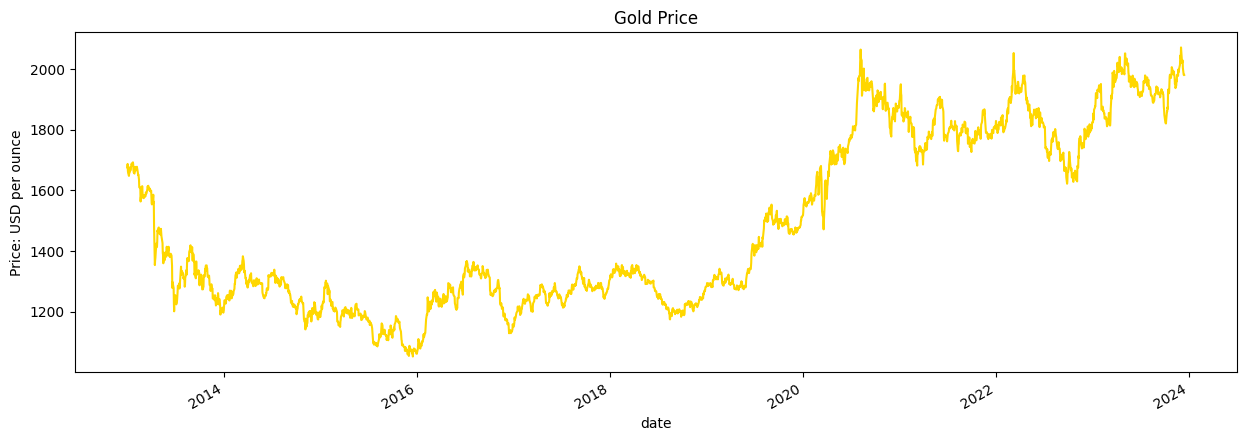

In [56]:
gold_df['gold_close'].plot(figsize=(15, 5), color='gold')
plt.title('Gold Price')
plt.ylabel('Price: USD per ounce')
plt.show()

<AxesSubplot: xlabel='date'>

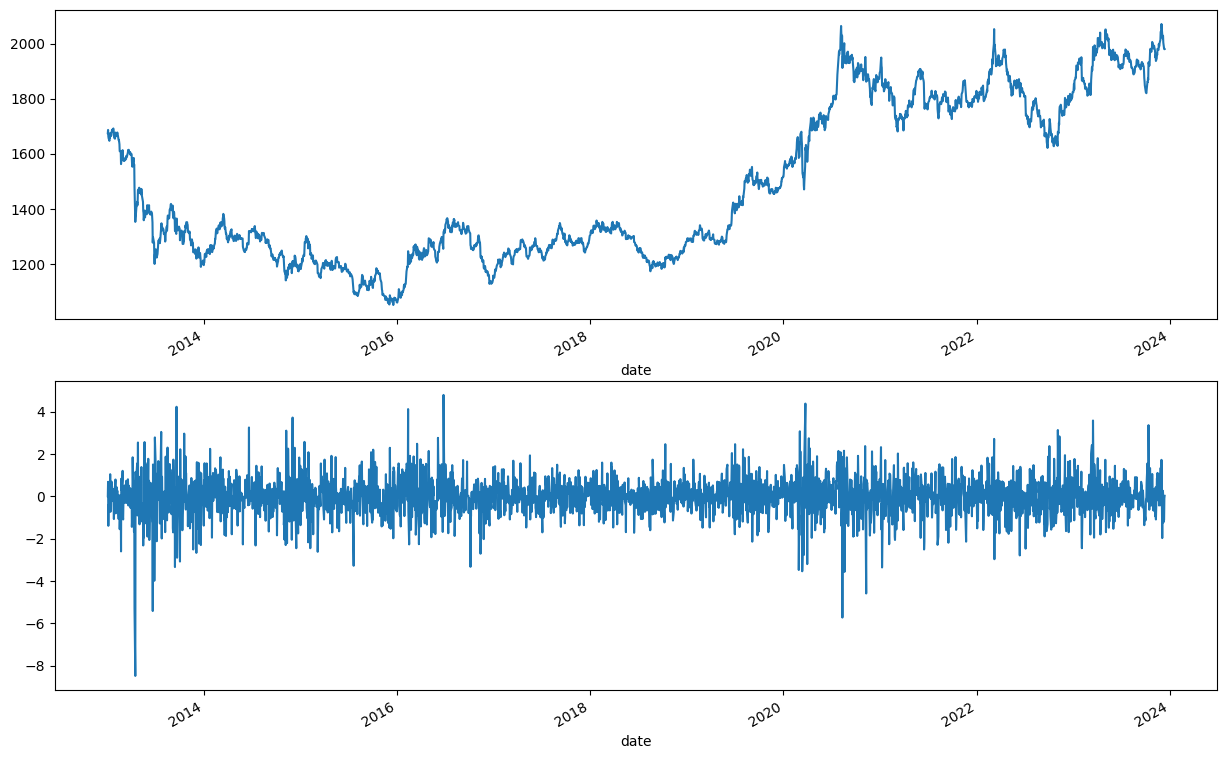

In [57]:
# plot gold_df price and gold_df percentage change
fig, axes = plt.subplots(2, 1, figsize=(15, 10))
gold_df['gold_close'].plot(ax=axes[0])
gold_df['Change %'].plot(ax=axes[1])

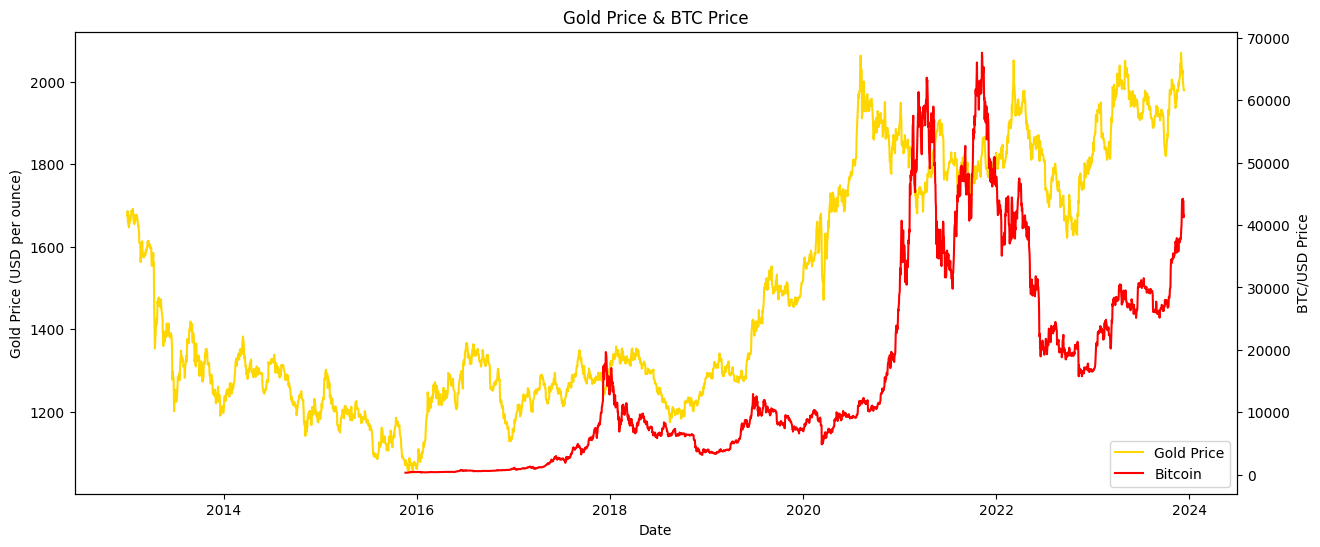

In [60]:
# visualize gold price and btc price with 2 y-axis
fig, ax1 = plt.subplots(figsize=(15, 6))
ax1.plot(gold_df['gold_close'], color='gold')
ax1.set_xlabel('Date')
ax1.set_ylabel('Gold Price (USD per ounce)')
ax2 = ax1.twinx()
ax2.plot(btc_usd_df['btcusd_close'], color='red')
ax2.set_ylabel('BTC/USD Price')
plt.title('Gold Price & BTC Price')
plt.legend(ax1.get_lines() + ax2.get_lines(), ['Gold Price', 'Bitcoin'], loc='lower right')
plt.show()

**Note**: Bitcoin data will not use to apply train/test and predict gold price because bitcoin influenced with gold price only after 2020 and it is not enough data size to train/test with other data.

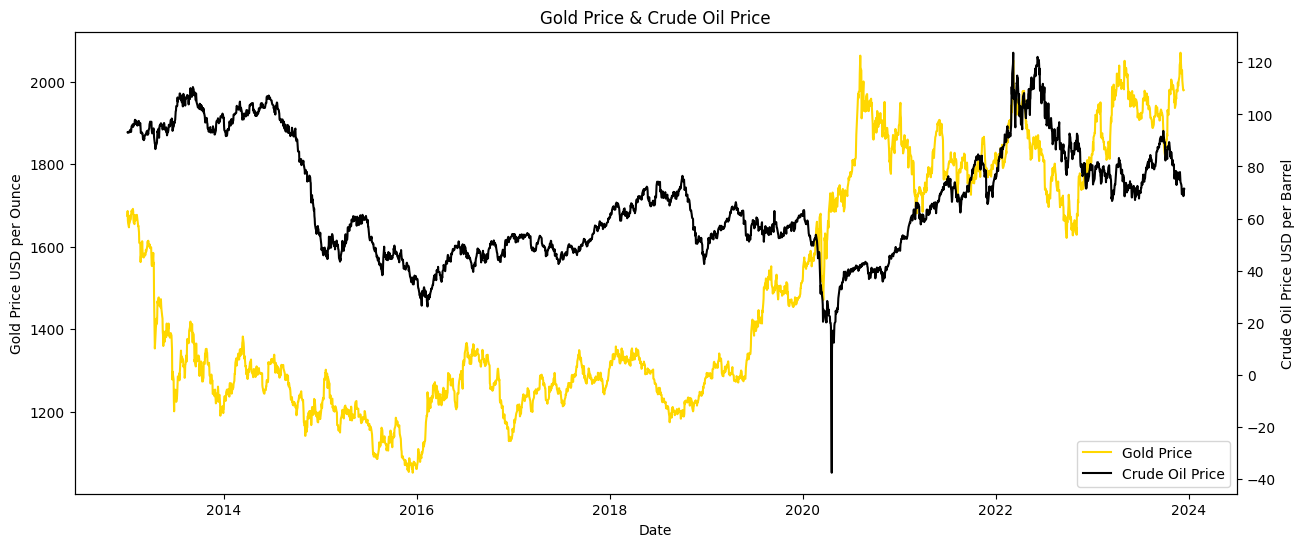

In [61]:
# visualize gold price and crude oil price with 2 y-axis
fig, ax1 = plt.subplots(figsize=(15, 6))
ax1.plot(gold_df['gold_close'], color='gold')
ax1.set_xlabel('Date')
ax1.set_ylabel('Gold Price USD per Ounce')
ax2 = ax1.twinx()
ax2.plot(crude_oil_df['crudeoil_close'], color='black')
ax2.set_ylabel('Crude Oil Price USD per Barrel')
plt.title('Gold Price & Crude Oil Price')
plt.legend(ax1.get_lines() + ax2.get_lines(), ['Gold Price', 'Crude Oil Price'], loc='lower right') 
plt.show()

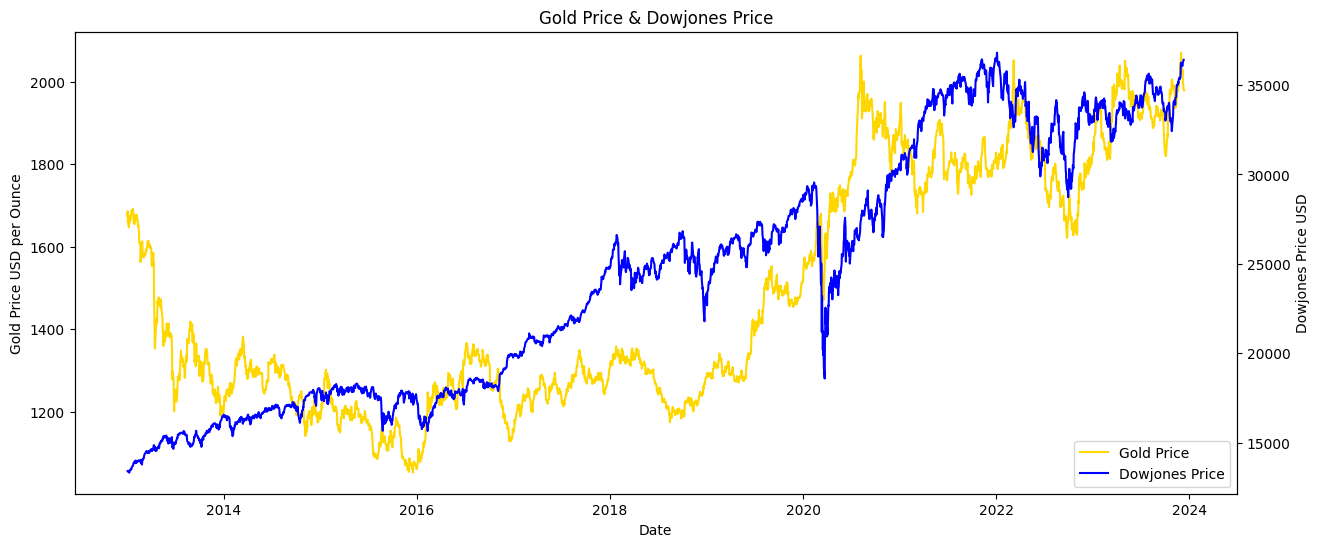

In [62]:
# correlate gold price and Dowjones price with 2 y axis
fig, ax1 = plt.subplots(figsize=(15, 6))
ax1.plot(gold_df['gold_close'], color='gold')
ax1.set_xlabel('Date')
ax1.set_ylabel('Gold Price USD per Ounce')
ax2 = ax1.twinx()
ax2.plot(dowjones_df['dowjones_close'], color='blue')
ax2.set_ylabel('Dowjones Price USD')
plt.title('Gold Price & Dowjones Price')
plt.legend(ax1.get_lines() + ax2.get_lines(), ['Gold Price', 'Dowjones Price'], loc='lower right')
plt.show()

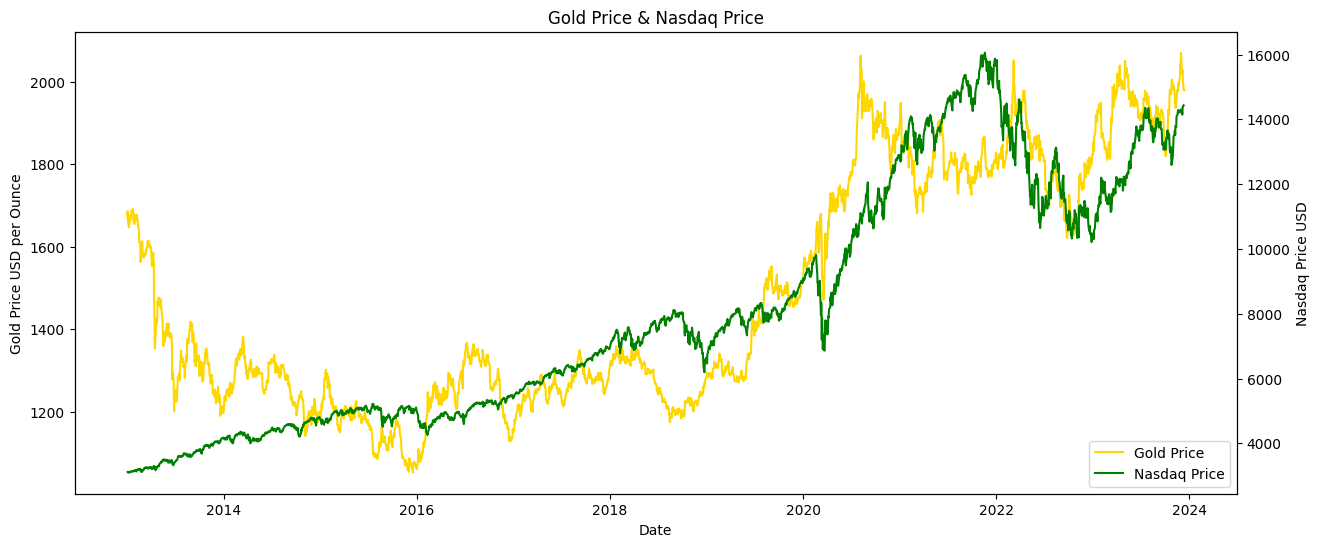

In [63]:
# correlate gold price and Nasdaq price with 2 y axis
fig, ax1 = plt.subplots(figsize=(15, 6))
ax1.plot(gold_df['gold_close'], color='gold')
ax1.set_xlabel('Date')
ax1.set_ylabel('Gold Price USD per Ounce')
ax2 = ax1.twinx()
ax2.plot(nasdaq_df['nasdaq_close'], color='green')
ax2.set_ylabel('Nasdaq Price USD')
plt.title('Gold Price & Nasdaq Price')
plt.legend(ax1.get_lines() + ax2.get_lines(), ['Gold Price', 'Nasdaq Price'], loc='lower right')
plt.show()

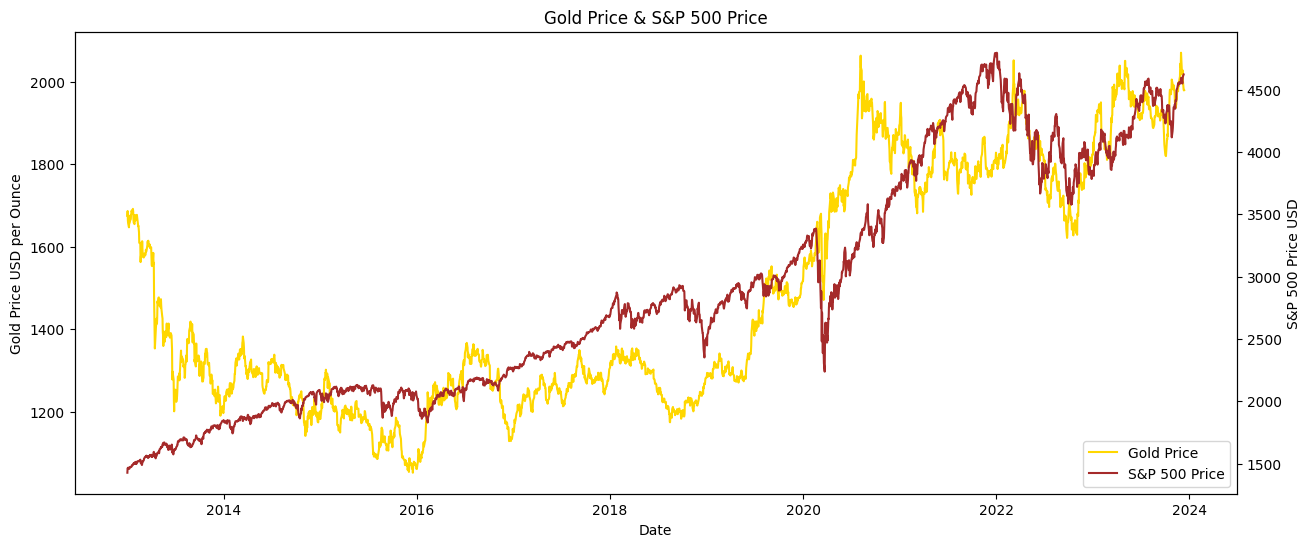

In [65]:
# correlate gold price and sp500 price with 2 y axis
fig, ax1 = plt.subplots(figsize=(15, 6))
ax1.plot(gold_df['gold_close'], color='gold')
ax1.set_xlabel('Date')
ax1.set_ylabel('Gold Price USD per Ounce')
ax2 = ax1.twinx()
ax2.plot(sp500_df['sp500_close'], color='brown')
ax2.set_ylabel('S&P 500 Price USD')
plt.title('Gold Price & S&P 500 Price')
plt.legend(ax1.get_lines() + ax2.get_lines(), ['Gold Price', 'S&P 500 Price'], loc='lower right')
plt.show()

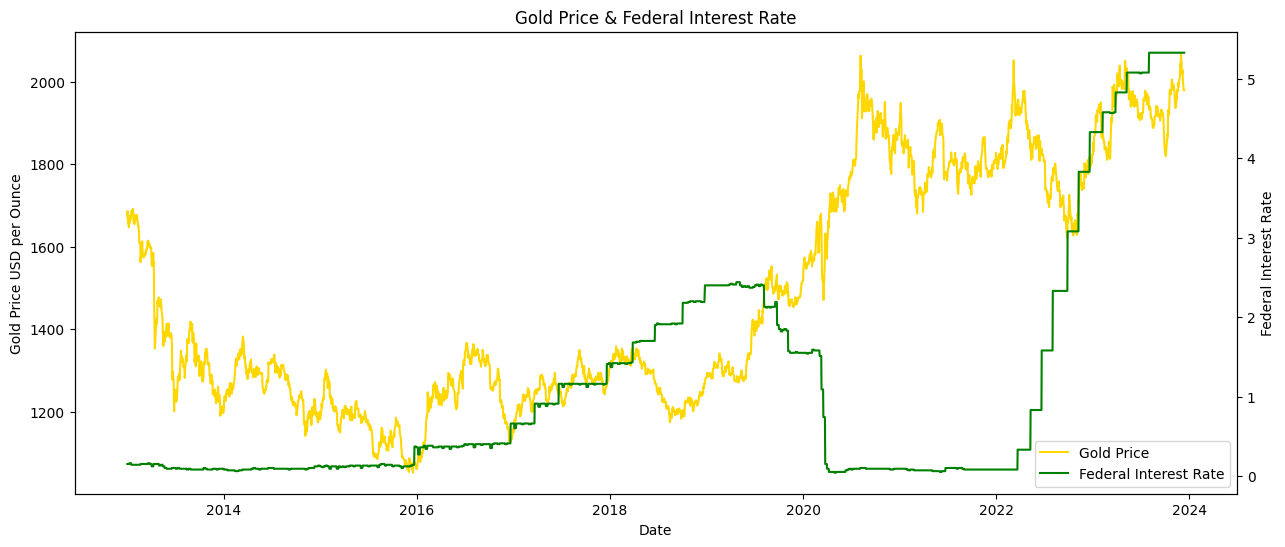

In [66]:
# correlate gold price and ff price with 2 y axis
fig, ax1 = plt.subplots(figsize=(15, 6))
ax1.plot(gold_df['gold_close'], color='gold')
ax1.set_xlabel('Date')
ax1.set_ylabel('Gold Price USD per Ounce')
ax2 = ax1.twinx()
ax2.plot(ff_df['ff_close'], color='green')
ax2.set_ylabel('Federal Interest Rate')
plt.title('Gold Price & Federal Interest Rate')
plt.legend(ax1.get_lines() + ax2.get_lines(), ['Gold Price', 'Federal Interest Rate'], loc='lower right')
plt.show()

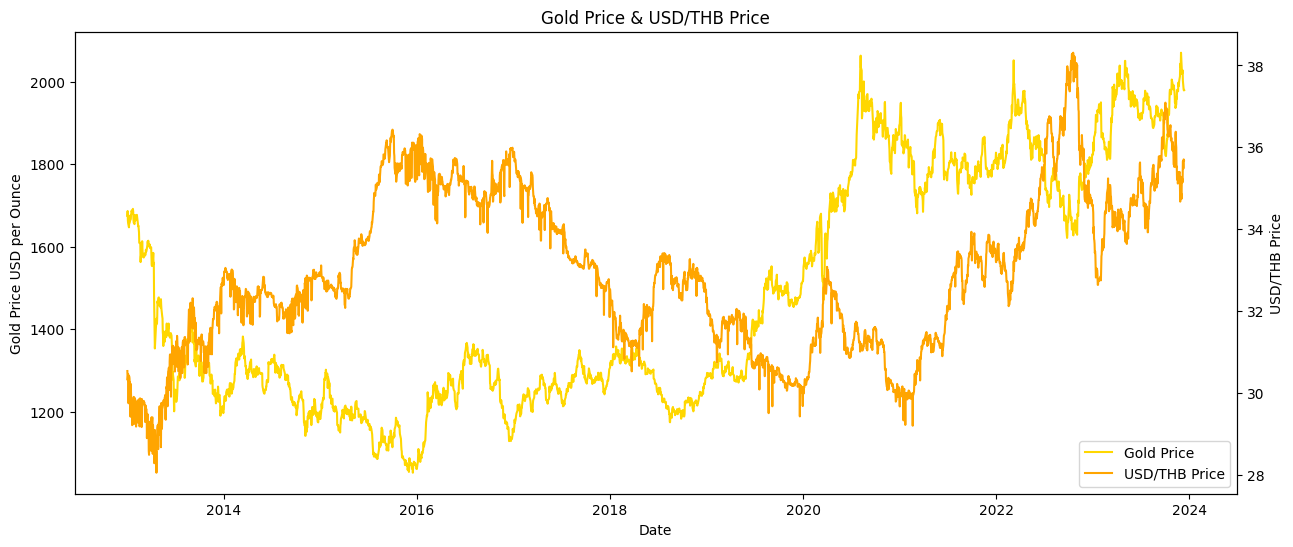

In [67]:
# correlate gold price and usd_thb price with 2 y axis
fig, ax1 = plt.subplots(figsize=(15, 6))
ax1.plot(gold_df['gold_close'], color='gold')
ax1.set_xlabel('Date')
ax1.set_ylabel('Gold Price USD per Ounce')
ax2 = ax1.twinx()
ax2.plot(usd_thb_df['usdthb_close'], color='orange')
ax2.set_ylabel('USD/THB Price')
plt.title('Gold Price & USD/THB Price')
plt.legend(ax1.get_lines() + ax2.get_lines(), ['Gold Price', 'USD/THB Price'], loc='lower right')
plt.show()

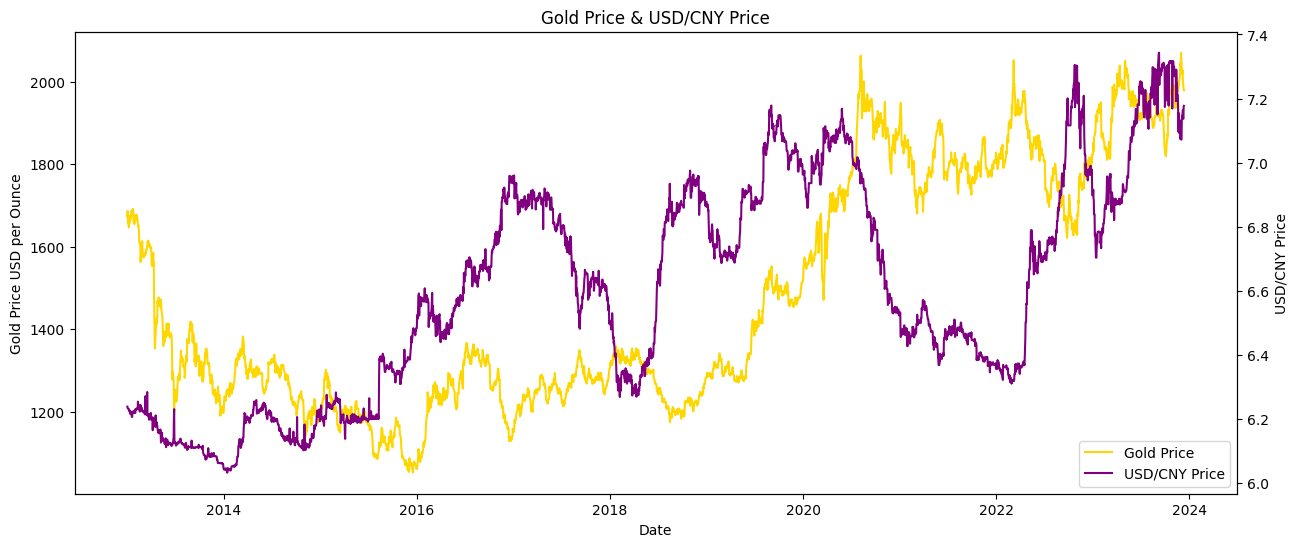

In [68]:
# correlate gold price and usd_cny price with 2 y axis
fig, ax1 = plt.subplots(figsize=(15, 6))
ax1.plot(gold_df['gold_close'], color='gold')
ax1.set_xlabel('Date')
ax1.set_ylabel('Gold Price USD per Ounce')
ax2 = ax1.twinx()
ax2.plot(usd_cny_df['usdcny_close'], color='purple')
ax2.set_ylabel('USD/CNY Price')
plt.title('Gold Price & USD/CNY Price')
plt.legend(ax1.get_lines() + ax2.get_lines(), ['Gold Price', 'USD/CNY Price'], loc='lower right')
plt.show()

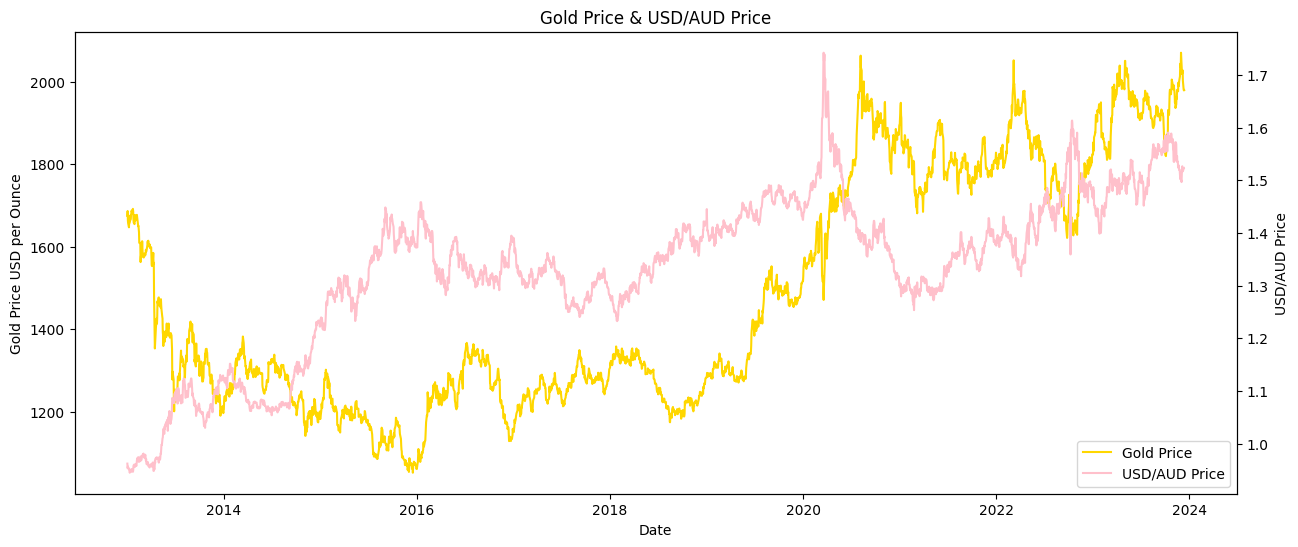

In [69]:
# correlate gold price and usd_aud price with 2 y axis
fig, ax1 = plt.subplots(figsize=(15, 6))
ax1.plot(gold_df['gold_close'], color='gold')
ax1.set_xlabel('Date')
ax1.set_ylabel('Gold Price USD per Ounce')
ax2 = ax1.twinx()
ax2.plot(usd_aud_df['usdaud_close'], color='pink')
ax2.set_ylabel('USD/AUD Price')
plt.title('Gold Price & USD/AUD Price')
plt.legend(ax1.get_lines() + ax2.get_lines(), ['Gold Price', 'USD/AUD Price'], loc='lower right')
plt.show()

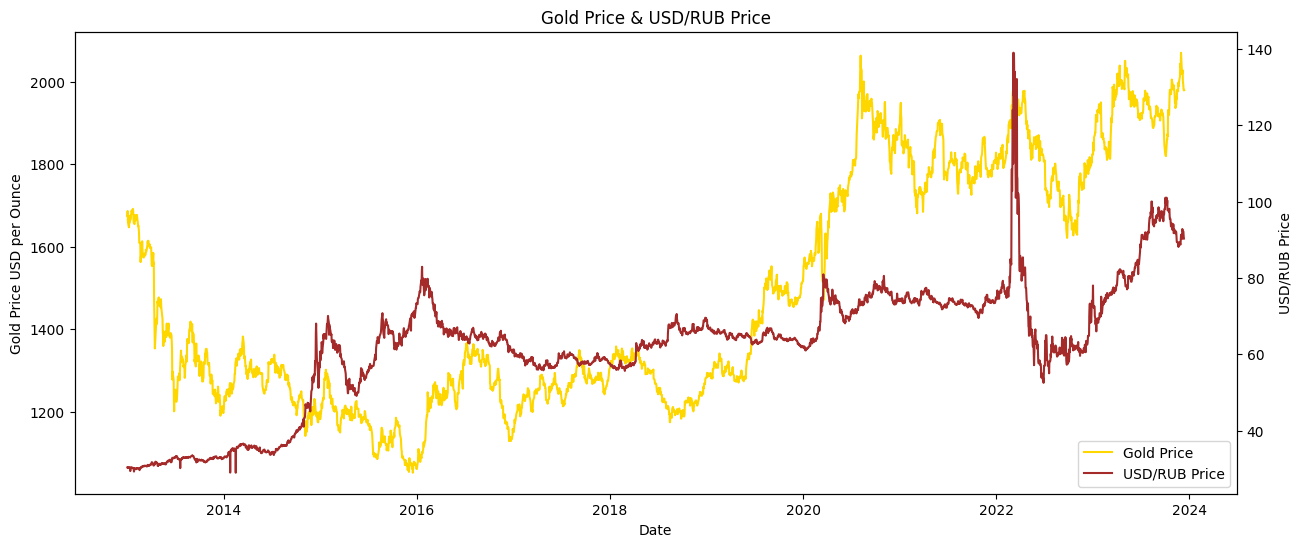

In [70]:
# correlate gold price and usd_rub price with 2 y axis
fig, ax1 = plt.subplots(figsize=(15, 6))
ax1.plot(gold_df['gold_close'], color='gold')
ax1.set_xlabel('Date')
ax1.set_ylabel('Gold Price USD per Ounce')
ax2 = ax1.twinx()
ax2.plot(usd_rub_df['usdrussia_close'], color='brown')
ax2.set_ylabel('USD/RUB Price')
plt.title('Gold Price & USD/RUB Price')
plt.legend(ax1.get_lines() + ax2.get_lines(), ['Gold Price', 'USD/RUB Price'], loc='lower right')
plt.show()

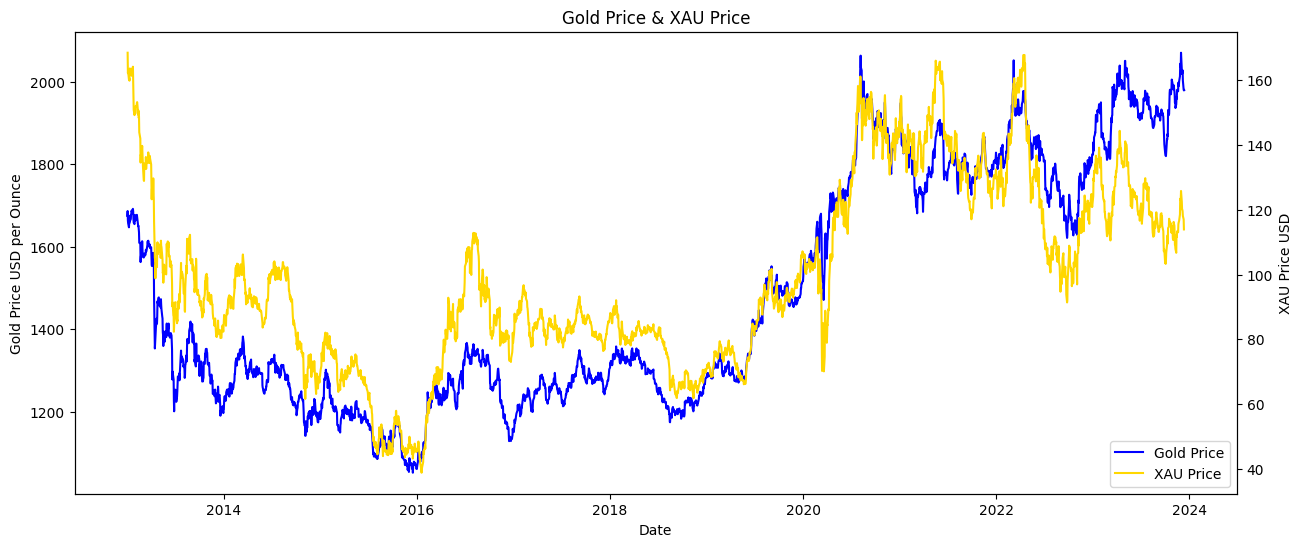

In [71]:
# correlate gold price and xau price with 2 y axis
fig, ax1 = plt.subplots(figsize=(15, 6))
ax1.plot(gold_df['gold_close'], color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Gold Price USD per Ounce')
ax2 = ax1.twinx()
ax2.plot(xau_df['xau_close'], color='gold')
ax2.set_ylabel('XAU Price USD')
plt.title('Gold Price & XAU Price')
plt.legend(ax1.get_lines() + ax2.get_lines(), ['Gold Price', 'XAU Price'], loc='lower right')
plt.show()

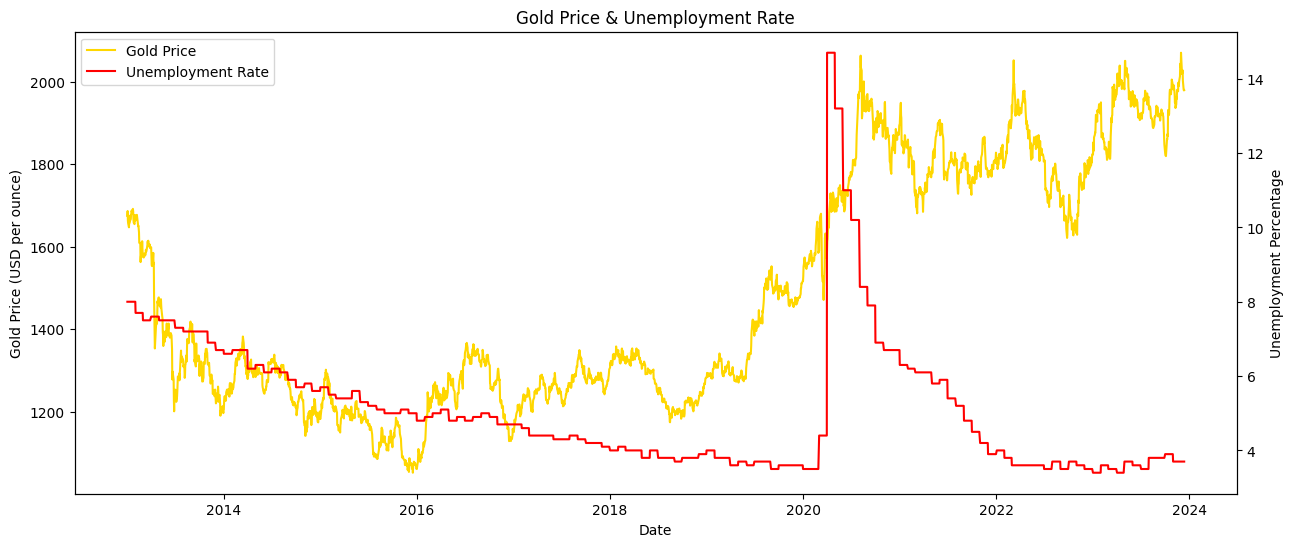

In [72]:
# correlate gold price and unemployment rate with 2 y axis
fig, ax1 = plt.subplots(figsize=(15, 6))
ax1.plot(gold_df['gold_close'], color='gold')
ax1.set_xlabel('Date')
ax1.set_ylabel('Gold Price (USD per ounce)')
ax2 = ax1.twinx()
ax2.plot(unemployment_df['UNRATE'], color='red')
ax2.set_ylabel('Unemployment Percentage')
plt.title('Gold Price & Unemployment Rate')
plt.legend(ax1.get_lines() + ax2.get_lines(), ['Gold Price', 'Unemployment Rate'], loc='upper left')
plt.show()

## Merge Data for more EDA

In [76]:
gold_merged_df = pd.merge(gold_df, crude_oil_df, left_index=True, right_index=True, how='left')
gold_merged_df = pd.merge(gold_merged_df, ff_df, left_index=True, right_index=True, how='left')
gold_merged_df = pd.merge(gold_merged_df, dowjones_df, left_index=True, right_index=True, how='left')
gold_merged_df = pd.merge(gold_merged_df, nasdaq_df, left_index=True, right_index=True, how='left')
gold_merged_df = pd.merge(gold_merged_df, sp500_df, left_index=True, right_index=True, how='left')
gold_merged_df = pd.merge(gold_merged_df, usd_thb_df, left_index=True, right_index=True, how='left')
gold_merged_df = pd.merge(gold_merged_df, usd_cny_df, left_index=True, right_index=True, how='left')
gold_merged_df = pd.merge(gold_merged_df, usd_aud_df, left_index=True, right_index=True, how='left')
gold_merged_df = pd.merge(gold_merged_df, usd_rub_df, left_index=True, right_index=True, how='left')
gold_merged_df = pd.merge(gold_merged_df, xau_df, left_index=True, right_index=True, how='left')
gold_merged_df = pd.merge(gold_merged_df, unemployment_df, left_index=True, right_index=True, how='left')

In [77]:
gold_merged_df.shape

(2851, 29)

In [78]:
gold_merged_df.head(10)

,gold_close,Open,High,Low,Change %_x,gold_diff,crudeoil_close,Change %_y,crudeoil_diff,ff_close,...,usdcny_close,usdcny_diff,usdaud_close,usdaud_diff,usdrussia_close,usdrussia_diff,xau_close,xau_diff,UNRATE,unemployment_diff
date,,,,,,,,,,,,,,,,,,,,,
2023-12-13,1980.01,1982.57,1982.57,1979.60,0.03,NaN,69.47,1.25%,-2.11,5.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.7,NaN
2023-12-12,1979.44,1981.59,1996.80,1977.19,-0.09,-0.57,68.61,-3.80%,-0.86,5.33,...,7.1770,0.0018,1.523334,0.000070,90.300,-0.660,113.93,-3.12,3.7,0.0
2023-12-11,1981.30,2003.60,2008.72,1975.95,-1.10,1.86,71.32,0.13%,2.71,5.33,...,7.1752,0.0386,1.523264,0.003554,90.960,-1.195,117.05,-1.04,3.7,0.0
2023-12-08,2003.39,2028.69,2034.19,1994.74,-1.23,22.09,71.23,2.73%,-0.09,5.33,...,7.1630,0.0134,1.519064,0.002429,92.155,-0.280,118.09,-1.42,3.7,0.0
2023-12-07,2028.34,2025.30,2039.93,2020.26,0.17,24.95,69.34,-0.06%,-1.89,5.33,...,7.1496,0.0040,1.516635,-0.009810,92.435,-0.365,119.51,-0.49,3.7,0.0
2023-12-06,2024.90,2019.74,2036.30,2017.27,0.27,-3.44,69.38,-4.07%,0.04,5.33,...,7.1456,-0.0010,1.526445,0.000895,92.800,2.586,120.00,-0.08,3.7,0.0
2023-12-05,2019.42,2030.15,2041.33,2010.02,-0.52,-5.48,72.32,-0.99%,2.94,5.33,...,7.1466,0.0104,1.525550,0.014303,90.214,-1.286,120.08,-2.37,3.7,0.0
2023-12-04,2030.06,2071.07,2135.72,2020.41,-1.97,10.64,73.04,-1.39%,0.72,5.33,...,7.1362,0.0644,1.511247,0.014777,91.500,0.275,122.45,-3.35,3.7,0.0
2023-12-01,2070.90,2034.49,2075.34,2033.75,1.73,40.84,74.07,-2.49%,1.03,5.33,...,7.0722,-0.0132,1.499925,-0.013896,91.225,1.250,125.80,2.45,3.7,0.0


In [79]:
# cross correlation between gold price and other features
gold_merged_df.corr()['gold_close'].sort_values(ascending=False)

C:\Users\hp\AppData\Local\Temp\ipykernel_17248\2171915585.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  gold_merged_df.corr()['gold_close'].sort_values(ascending=False)


gold_close           1.000000
Low                  0.999488
High                 0.999385
Open                 0.998778
xau_close            0.886777
nasdaq_close         0.850763
sp500_close          0.834222
dowjones_close       0.801899
usdrussia_close      0.535869
usdaud_close         0.390040
usdcny_close         0.387004
ff_close             0.372022
crudeoil_close       0.223813
Change %_x           0.032433
UNRATE               0.032384
ff_diff              0.029942
usdcny_diff          0.024981
nasdaq_diff          0.019390
sp500_diff           0.018509
gold_diff            0.015490
xau_diff             0.015265
unemployment_diff    0.010749
dowjones_diff        0.010625
usdrussia_diff      -0.008629
crudeoil_diff       -0.013856
usdaud_diff         -0.017211
usdthb_diff         -0.026735
usdthb_close        -0.070107
Name: gold_close, dtype: float64

In [80]:
gold_merged_df.isnull().sum()

gold_close             0
Open                   0
High                   0
Low                    0
Change %_x             0
gold_diff              1
crudeoil_close        15
Change %_y            15
crudeoil_diff         15
ff_close               0
ff_diff                1
dowjones_close       104
dowjones_diff        105
nasdaq_close          96
nasdaq_diff           97
sp500_close           95
sp500_diff            96
usdthb_close           1
usdthb_diff            2
usdcny_close           1
usdcny_diff            2
usdaud_close           1
usdaud_diff            2
usdrussia_close        1
usdrussia_diff         2
xau_close             95
xau_diff              96
UNRATE                 0
unemployment_diff      1
dtype: int64

In [81]:
# drop null values
gold_merged_df.dropna(inplace=True)
gold_merged_df.shape

(2745, 29)

In [82]:
gold_merged_df.head()

,gold_close,Open,High,Low,Change %_x,gold_diff,crudeoil_close,Change %_y,crudeoil_diff,ff_close,...,usdcny_close,usdcny_diff,usdaud_close,usdaud_diff,usdrussia_close,usdrussia_diff,xau_close,xau_diff,UNRATE,unemployment_diff
date,,,,,,,,,,,,,,,,,,,,,
2023-12-11,1981.30,2003.60,2008.72,1975.95,-1.10,1.86,71.32,0.13%,2.71,5.33,...,7.1752,0.0386,1.523264,0.003554,90.960,-1.195,117.05,-1.04,3.7,0.0
2023-12-08,2003.39,2028.69,2034.19,1994.74,-1.23,22.09,71.23,2.73%,-0.09,5.33,...,7.1630,0.0134,1.519064,0.002429,92.155,-0.280,118.09,-1.42,3.7,0.0
2023-12-07,2028.34,2025.30,2039.93,2020.26,0.17,24.95,69.34,-0.06%,-1.89,5.33,...,7.1496,0.0040,1.516635,-0.009810,92.435,-0.365,119.51,-0.49,3.7,0.0
2023-12-06,2024.90,2019.74,2036.30,2017.27,0.27,-3.44,69.38,-4.07%,0.04,5.33,...,7.1456,-0.0010,1.526445,0.000895,92.800,2.586,120.00,-0.08,3.7,0.0
2023-12-05,2019.42,2030.15,2041.33,2010.02,-0.52,-5.48,72.32,-0.99%,2.94,5.33,...,7.1466,0.0104,1.525550,0.014303,90.214,-1.286,120.08,-2.37,3.7,0.0


In [83]:
# drop columns
gold_merged_df.drop(['Change %_x', 'Change %_y'], axis=1, inplace=True)

In [84]:
gold_merged_df.head()

,gold_close,Open,High,Low,gold_diff,crudeoil_close,crudeoil_diff,ff_close,ff_diff,dowjones_close,...,usdcny_close,usdcny_diff,usdaud_close,usdaud_diff,usdrussia_close,usdrussia_diff,xau_close,xau_diff,UNRATE,unemployment_diff
date,,,,,,,,,,,,,,,,,,,,,
2023-12-11,1981.30,2003.60,2008.72,1975.95,1.86,71.32,2.71,5.33,0.0,36404.93,...,7.1752,0.0386,1.523264,0.003554,90.960,-1.195,117.05,-1.04,3.7,0.0
2023-12-08,2003.39,2028.69,2034.19,1994.74,22.09,71.23,-0.09,5.33,0.0,36247.87,...,7.1630,0.0134,1.519064,0.002429,92.155,-0.280,118.09,-1.42,3.7,0.0
2023-12-07,2028.34,2025.30,2039.93,2020.26,24.95,69.34,-1.89,5.33,0.0,36117.38,...,7.1496,0.0040,1.516635,-0.009810,92.435,-0.365,119.51,-0.49,3.7,0.0
2023-12-06,2024.90,2019.74,2036.30,2017.27,-3.44,69.38,0.04,5.33,0.0,36054.43,...,7.1456,-0.0010,1.526445,0.000895,92.800,2.586,120.00,-0.08,3.7,0.0
2023-12-05,2019.42,2030.15,2041.33,2010.02,-5.48,72.32,2.94,5.33,0.0,36124.56,...,7.1466,0.0104,1.525550,0.014303,90.214,-1.286,120.08,-2.37,3.7,0.0


In [85]:
gold_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2745 entries, 2023-12-11 to 2013-01-03
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gold_close         2745 non-null   float64
 1   Open               2745 non-null   float64
 2   High               2745 non-null   float64
 3   Low                2745 non-null   float64
 4   gold_diff          2745 non-null   float64
 5   crudeoil_close     2745 non-null   float64
 6   crudeoil_diff      2745 non-null   float64
 7   ff_close           2745 non-null   float64
 8   ff_diff            2745 non-null   float64
 9   dowjones_close     2745 non-null   float64
 10  dowjones_diff      2745 non-null   float64
 11  nasdaq_close       2745 non-null   float64
 12  nasdaq_diff        2745 non-null   float64
 13  sp500_close        2745 non-null   float64
 14  sp500_diff         2745 non-null   float64
 15  usdthb_close       2745 non-null   float64
 16  usdthb

## Data Aggregation

In [86]:
# make gold_merged_df to weekly data by resampling in new dataframe
gold_merged_weekly_df = gold_merged_df.resample('W').mean()
gold_merged_weekly_df.head()

,gold_close,Open,High,Low,gold_diff,crudeoil_close,crudeoil_diff,ff_close,ff_diff,dowjones_close,...,usdcny_close,usdcny_diff,usdaud_close,usdaud_diff,usdrussia_close,usdrussia_diff,xau_close,xau_diff,UNRATE,unemployment_diff
date,,,,,,,,,,,,,,,,,,,,,
2013-01-06,1660.100,1674.9800,1677.2100,1643.6450,8.0500,93.005,-0.135,0.150,0.000,13413.2850,...,6.231550,-0.001300,0.955613,0.000455,30.30890,0.090700,162.3450,-2.970,8.00,0.00
2013-01-13,1660.490,1659.1600,1669.5360,1649.7980,-3.9900,93.364,-0.190,0.156,0.002,13412.6600,...,6.223900,-0.002940,0.949779,-0.000756,30.25152,-0.009600,161.5120,0.166,8.00,0.00
2013-01-20,1679.438,1674.9160,1687.3320,1670.1140,-4.5700,94.542,-0.420,0.148,-0.004,13559.8320,...,6.215780,-0.002160,0.948222,0.000559,30.23982,-0.000120,162.2960,-0.404,8.00,0.00
2013-01-27,1676.070,1684.1625,1687.7275,1672.7375,9.2875,95.825,-0.050,0.140,0.000,13803.2125,...,6.221275,0.000225,0.953148,0.002053,30.09735,-0.058325,157.3925,-2.630,8.00,0.00
2013-02-03,1665.330,1663.8720,1675.1960,1657.6260,-3.8900,97.442,0.054,0.140,0.000,13923.4280,...,6.223440,0.002220,0.958993,0.000126,29.99638,-0.022900,150.7000,0.224,7.94,0.06


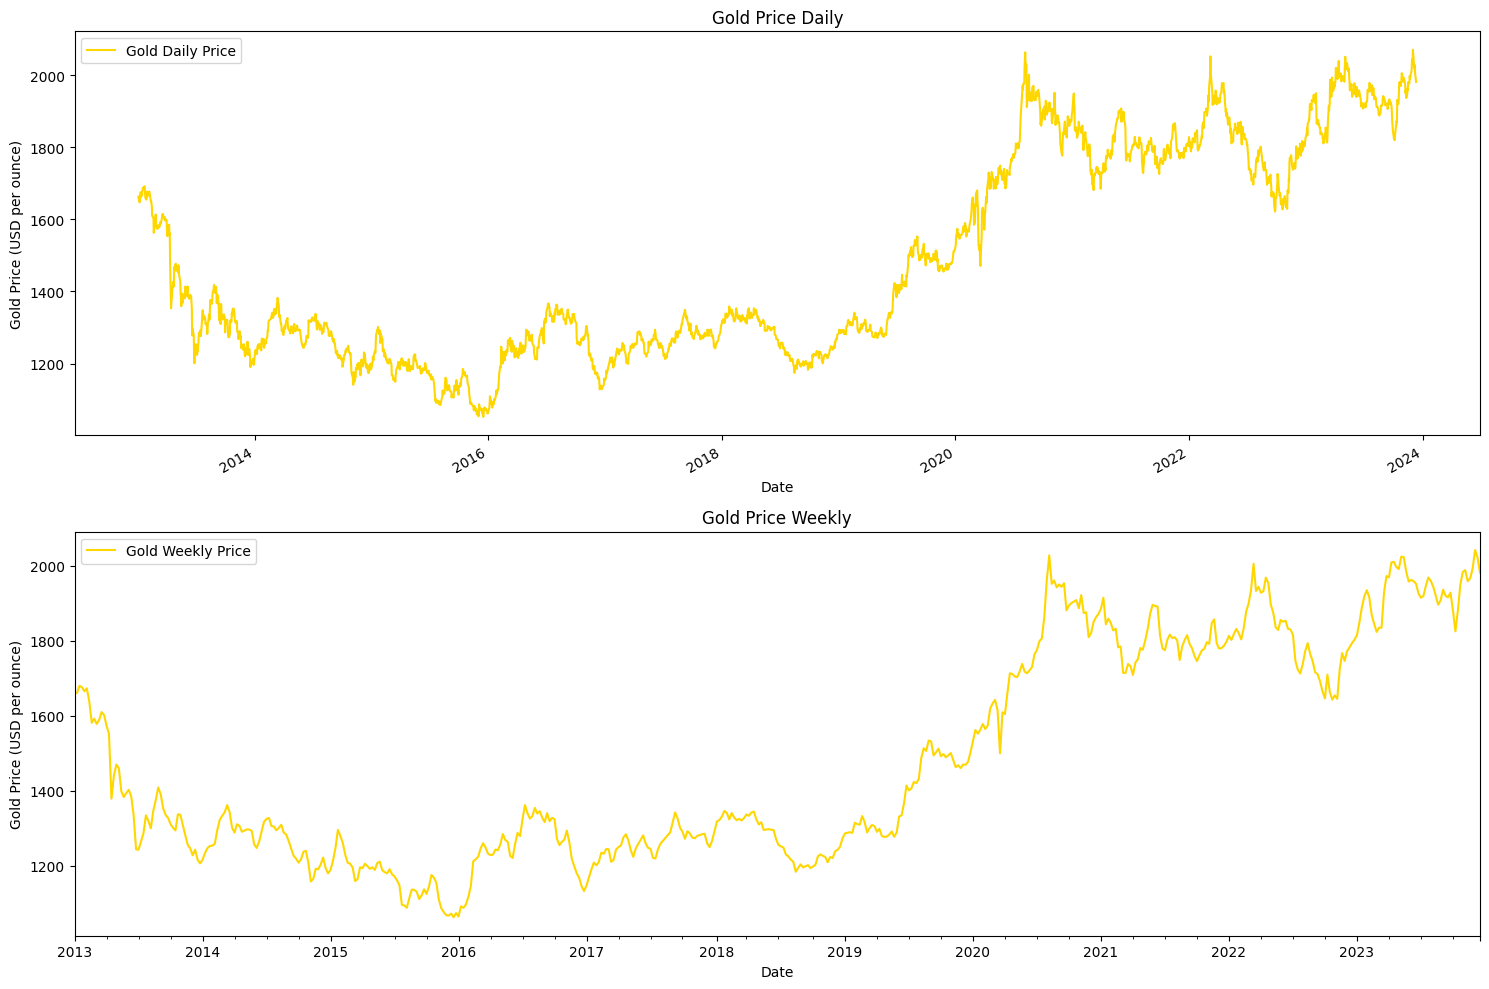

In [87]:
# Plotting
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

gold_merged_df['gold_close'].plot(ax=axes[0], label='Gold Daily Price', color='gold')
axes[0].set_title('Gold Price Daily')
axes[0].legend(labels=['Gold Daily Price'])
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Gold Price (USD per ounce)')

gold_merged_weekly_df['gold_close'].plot(ax=axes[1], label='Gold Weekly Price', color='gold')
axes[1].set_title('Gold Price Weekly')
axes[1].legend(labels=['Gold Weekly Price'])
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Gold Price (USD per ounce)')

plt.tight_layout()
plt.show()


In [88]:
gold_merged_weekly_df.isnull().sum()

gold_close           0
Open                 0
High                 0
Low                  0
gold_diff            0
crudeoil_close       0
crudeoil_diff        0
ff_close             0
ff_diff              0
dowjones_close       0
dowjones_diff        0
nasdaq_close         0
nasdaq_diff          0
sp500_close          0
sp500_diff           0
usdthb_close         0
usdthb_diff          0
usdcny_close         0
usdcny_diff          0
usdaud_close         0
usdaud_diff          0
usdrussia_close      0
usdrussia_diff       0
xau_close            0
xau_diff             0
UNRATE               0
unemployment_diff    0
dtype: int64

In [89]:
# drop 'Open', 'High', 'Low' columns
gold_merged_df.drop(['Open', 'High', 'Low'], axis=1, inplace=True)
gold_merged_weekly_df.drop(['Open', 'High', 'Low'], axis=1, inplace=True)

In [90]:
gold_merged_df.columns

Index(['gold_close', 'gold_diff', 'crudeoil_close', 'crudeoil_diff',
       'ff_close', 'ff_diff', 'dowjones_close', 'dowjones_diff',
       'nasdaq_close', 'nasdaq_diff', 'sp500_close', 'sp500_diff',
       'usdthb_close', 'usdthb_diff', 'usdcny_close', 'usdcny_diff',
       'usdaud_close', 'usdaud_diff', 'usdrussia_close', 'usdrussia_diff',
       'xau_close', 'xau_diff', 'UNRATE', 'unemployment_diff'],
      dtype='object')

In [91]:
gold_merged_weekly_df.columns

Index(['gold_close', 'gold_diff', 'crudeoil_close', 'crudeoil_diff',
       'ff_close', 'ff_diff', 'dowjones_close', 'dowjones_diff',
       'nasdaq_close', 'nasdaq_diff', 'sp500_close', 'sp500_diff',
       'usdthb_close', 'usdthb_diff', 'usdcny_close', 'usdcny_diff',
       'usdaud_close', 'usdaud_diff', 'usdrussia_close', 'usdrussia_diff',
       'xau_close', 'xau_diff', 'UNRATE', 'unemployment_diff'],
      dtype='object')

# Feature Engineering
Create feature rise and fall columns of all close price features (Gold Weekly Dataframe)

In [92]:
gold_merged_weekly_df.head()

,gold_close,gold_diff,crudeoil_close,crudeoil_diff,ff_close,ff_diff,dowjones_close,dowjones_diff,nasdaq_close,nasdaq_diff,...,usdcny_close,usdcny_diff,usdaud_close,usdaud_diff,usdrussia_close,usdrussia_diff,xau_close,xau_diff,UNRATE,unemployment_diff
date,,,,,,,,,,,,,,,,,,,,,
2013-01-06,1660.100,8.0500,93.005,-0.135,0.150,0.000,13413.2850,11.330,3101.115,-5.300,...,6.231550,-0.001300,0.955613,0.000455,30.30890,0.090700,162.3450,-2.970,8.00,0.00
2013-01-13,1660.490,-3.9900,93.364,-0.190,0.156,0.002,13412.6600,10.644,3108.764,4.794,...,6.223900,-0.002940,0.949779,-0.000756,30.25152,-0.009600,161.5120,0.166,8.00,0.00
2013-01-20,1679.438,-4.5700,94.542,-0.420,0.148,-0.004,13559.8320,32.254,3123.306,1.816,...,6.215780,-0.002160,0.948222,0.000559,30.23982,-0.000120,162.2960,-0.404,8.00,0.00
2013-01-27,1676.070,9.2875,95.825,-0.050,0.140,0.000,13803.2125,61.570,3144.235,3.750,...,6.221275,0.000225,0.953148,0.002053,30.09735,-0.058325,157.3925,-2.630,8.00,0.00
2013-02-03,1665.330,-3.8900,97.442,0.054,0.140,0.000,13923.4280,22.762,3154.300,5.878,...,6.223440,0.002220,0.958993,0.000126,29.99638,-0.022900,150.7000,0.224,7.94,0.06


In [93]:
gold_merged_weekly_df.columns

Index(['gold_close', 'gold_diff', 'crudeoil_close', 'crudeoil_diff',
       'ff_close', 'ff_diff', 'dowjones_close', 'dowjones_diff',
       'nasdaq_close', 'nasdaq_diff', 'sp500_close', 'sp500_diff',
       'usdthb_close', 'usdthb_diff', 'usdcny_close', 'usdcny_diff',
       'usdaud_close', 'usdaud_diff', 'usdrussia_close', 'usdrussia_diff',
       'xau_close', 'xau_diff', 'UNRATE', 'unemployment_diff'],
      dtype='object')

In [94]:
gold_merged_weekly_df['next_week_price'] = gold_merged_weekly_df["gold_close"].shift(-1)
gold_merged_weekly_df['label'] = (gold_merged_weekly_df['gold_close'] < gold_merged_weekly_df['next_week_price']).astype(int)

In [95]:
# next week price all close columns
for col in ['gold_close', 'crudeoil_close', 'ff_close', 'dowjones_close', 'nasdaq_close', 'sp500_close', 'usdthb_close', 'usdcny_close', 'usdaud_close', 'usdrussia_close', 'xau_close']:
    gold_merged_weekly_df[col + '_rise'] = gold_merged_weekly_df[col].diff().map(lambda x: 1 if x > 0 else 0)

In [96]:
gold_merged_weekly_df

,gold_close,gold_diff,crudeoil_close,crudeoil_diff,ff_close,ff_diff,dowjones_close,dowjones_diff,nasdaq_close,nasdaq_diff,...,crudeoil_close_rise,ff_close_rise,dowjones_close_rise,nasdaq_close_rise,sp500_close_rise,usdthb_close_rise,usdcny_close_rise,usdaud_close_rise,usdrussia_close_rise,xau_close_rise
date,,,,,,,,,,,,,,,,,,,,,
2013-01-06,1660.1000,8.0500,93.0050,-0.135,0.150,0.000,13413.2850,11.3300,3101.1150,-5.300,...,0,0,0,0,0,0,0,0,0,0
2013-01-13,1660.4900,-3.9900,93.3640,-0.190,0.156,0.002,13412.6600,10.6440,3108.7640,4.794,...,1,1,0,1,1,0,0,0,0,0
2013-01-20,1679.4380,-4.5700,94.5420,-0.420,0.148,-0.004,13559.8320,32.2540,3123.3060,1.816,...,1,0,1,1,1,0,0,0,0,1
2013-01-27,1676.0700,9.2875,95.8250,-0.050,0.140,0.000,13803.2125,61.5700,3144.2350,3.750,...,1,0,1,1,1,0,1,1,0,0
2013-02-03,1665.3300,-3.8900,97.4420,0.054,0.140,0.000,13923.4280,22.7620,3154.3000,5.878,...,1,0,1,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-19,1965.7020,-6.2600,76.3940,0.132,5.330,0.000,34809.9060,132.8360,14041.0220,65.474,...,0,0,1,1,1,0,0,0,0,1
2023-11-26,1991.8125,-6.5675,77.0025,0.485,5.330,0.000,35225.6275,110.7175,14250.3075,31.345,...,1,0,1,1,1,0,0,0,0,1
2023-12-03,2041.1540,-3.2840,75.8320,0.364,5.330,0.000,35675.4520,171.0700,14262.5040,10.834,...,0,0,1,1,1,0,0,0,1,1


In [97]:
gold_merged_weekly_df['label']

date
2013-01-06    1
2013-01-13    1
2013-01-20    0
2013-01-27    0
2013-02-03    1
             ..
2023-11-19    1
2023-11-26    1
2023-12-03    0
2023-12-10    0
2023-12-17    0
Freq: W-SUN, Name: label, Length: 572, dtype: int32

In [98]:
gold_merged_weekly_df['label'].value_counts()

1    292
0    280
Name: label, dtype: int64

In [99]:
# create gold price diff weekly lag 1 column
gold_merged_weekly_df['gold_price_weekdiff_lag_1'] = gold_merged_weekly_df['gold_close'].diff()
gold_merged_weekly_df.tail()

,gold_close,gold_diff,crudeoil_close,crudeoil_diff,ff_close,ff_diff,dowjones_close,dowjones_diff,nasdaq_close,nasdaq_diff,...,ff_close_rise,dowjones_close_rise,nasdaq_close_rise,sp500_close_rise,usdthb_close_rise,usdcny_close_rise,usdaud_close_rise,usdrussia_close_rise,xau_close_rise,gold_price_weekdiff_lag_1
date,,,,,,,,,,,,,,,,,,,,,
2023-11-19,1965.7020,-6.2600,76.3940,0.132,5.33,0.0,34809.9060,132.8360,14041.0220,65.474,...,0,1,1,1,0,0,0,0,1,7.5320
2023-11-26,1991.8125,-6.5675,77.0025,0.485,5.33,0.0,35225.6275,110.7175,14250.3075,31.345,...,0,1,1,1,0,0,0,0,1,26.1105
2023-12-03,2041.1540,-3.2840,75.8320,0.364,5.33,0.0,35675.4520,171.0700,14262.5040,10.834,...,0,1,1,1,0,0,0,1,1,49.3415
2023-12-10,2021.2220,9.7520,71.0620,0.344,5.33,0.0,36149.7360,0.4740,14261.2140,19.788,...,0,1,0,1,1,1,1,1,0,-19.9320
2023-12-17,1981.3000,1.8600,71.3200,2.710,5.33,0.0,36404.9300,157.0600,14432.4900,28.520,...,0,1,1,1,1,1,1,0,0,-39.9220


In [100]:
# label encoding if value is positive or negative
gold_merged_weekly_df['label'] = gold_merged_weekly_df['gold_price_weekdiff_lag_1'].map(lambda x: 1 if x > 0 else 0)

In [101]:
gold_merged_weekly_df['label'] = gold_merged_weekly_df['label'].shift(-1)

In [102]:
gold_merged_weekly_df['label'].value_counts()

1.0    292
0.0    279
Name: label, dtype: int64

In [103]:
gold_merged_weekly_df.head()

,gold_close,gold_diff,crudeoil_close,crudeoil_diff,ff_close,ff_diff,dowjones_close,dowjones_diff,nasdaq_close,nasdaq_diff,...,ff_close_rise,dowjones_close_rise,nasdaq_close_rise,sp500_close_rise,usdthb_close_rise,usdcny_close_rise,usdaud_close_rise,usdrussia_close_rise,xau_close_rise,gold_price_weekdiff_lag_1
date,,,,,,,,,,,,,,,,,,,,,
2013-01-06,1660.100,8.0500,93.005,-0.135,0.150,0.000,13413.2850,11.330,3101.115,-5.300,...,0,0,0,0,0,0,0,0,0,NaN
2013-01-13,1660.490,-3.9900,93.364,-0.190,0.156,0.002,13412.6600,10.644,3108.764,4.794,...,1,0,1,1,0,0,0,0,0,0.390
2013-01-20,1679.438,-4.5700,94.542,-0.420,0.148,-0.004,13559.8320,32.254,3123.306,1.816,...,0,1,1,1,0,0,0,0,1,18.948
2013-01-27,1676.070,9.2875,95.825,-0.050,0.140,0.000,13803.2125,61.570,3144.235,3.750,...,0,1,1,1,0,1,1,0,0,-3.368
2013-02-03,1665.330,-3.8900,97.442,0.054,0.140,0.000,13923.4280,22.762,3154.300,5.878,...,0,1,1,1,0,1,1,0,0,-10.740


In [104]:
gold_merged_weekly_df.dropna(inplace=True)
gold_merged_weekly_df.tail()

,gold_close,gold_diff,crudeoil_close,crudeoil_diff,ff_close,ff_diff,dowjones_close,dowjones_diff,nasdaq_close,nasdaq_diff,...,ff_close_rise,dowjones_close_rise,nasdaq_close_rise,sp500_close_rise,usdthb_close_rise,usdcny_close_rise,usdaud_close_rise,usdrussia_close_rise,xau_close_rise,gold_price_weekdiff_lag_1
date,,,,,,,,,,,,,,,,,,,,,
2023-11-12,1958.1700,6.3580,77.2860,0.512,5.33,0.0,34107.1540,44.3560,13625.7220,63.966,...,0,1,1,1,0,0,1,0,0,-29.5320
2023-11-19,1965.7020,-6.2600,76.3940,0.132,5.33,0.0,34809.9060,132.8360,14041.0220,65.474,...,0,1,1,1,0,0,0,0,1,7.5320
2023-11-26,1991.8125,-6.5675,77.0025,0.485,5.33,0.0,35225.6275,110.7175,14250.3075,31.345,...,0,1,1,1,0,0,0,0,1,26.1105
2023-12-03,2041.1540,-3.2840,75.8320,0.364,5.33,0.0,35675.4520,171.0700,14262.5040,10.834,...,0,1,1,1,0,0,0,1,1,49.3415
2023-12-10,2021.2220,9.7520,71.0620,0.344,5.33,0.0,36149.7360,0.4740,14261.2140,19.788,...,0,1,0,1,1,1,1,1,0,-19.9320


In [105]:
gold_merged_weekly_df.shape

(570, 38)

**Train/Test Split**

Do multi-correlation and predict diff features to predict YEAR 2024

In [106]:
gold_merged_weekly_df.columns

Index(['gold_close', 'gold_diff', 'crudeoil_close', 'crudeoil_diff',
       'ff_close', 'ff_diff', 'dowjones_close', 'dowjones_diff',
       'nasdaq_close', 'nasdaq_diff', 'sp500_close', 'sp500_diff',
       'usdthb_close', 'usdthb_diff', 'usdcny_close', 'usdcny_diff',
       'usdaud_close', 'usdaud_diff', 'usdrussia_close', 'usdrussia_diff',
       'xau_close', 'xau_diff', 'UNRATE', 'unemployment_diff',
       'next_week_price', 'label', 'gold_close_rise', 'crudeoil_close_rise',
       'ff_close_rise', 'dowjones_close_rise', 'nasdaq_close_rise',
       'sp500_close_rise', 'usdthb_close_rise', 'usdcny_close_rise',
       'usdaud_close_rise', 'usdrussia_close_rise', 'xau_close_rise',
       'gold_price_weekdiff_lag_1'],
      dtype='object')

In [107]:
# Split data to predict gold price and other features (diff) to forecast gold price
X = gold_merged_weekly_df[['gold_close_rise', 'crudeoil_close_rise', 'ff_close_rise',
       'dowjones_close_rise', 'nasdaq_close_rise', 'sp500_close_rise',
       'usdthb_close_rise', 'usdcny_close_rise', 'usdaud_close_rise',
       'usdrussia_close_rise', 'xau_close_rise']]
y = gold_merged_weekly_df['label']

In [108]:
X.shape, y.shape

((570, 11), (570,))

In [109]:
# Train test split with test(2023-01-01 onward)
X_train = X.loc[:'2022-12-30']
X_test = X.loc['2023-01-01':]
y_train = y.loc[:'2022-12-30']
y_test = y.loc['2023-01-01':]

In [110]:
X_train

,gold_close_rise,crudeoil_close_rise,ff_close_rise,dowjones_close_rise,nasdaq_close_rise,sp500_close_rise,usdthb_close_rise,usdcny_close_rise,usdaud_close_rise,usdrussia_close_rise,xau_close_rise
date,,,,,,,,,,,
2013-01-13,1,1,1,0,1,1,0,0,0,0,0
2013-01-20,1,1,0,1,1,1,0,0,0,0,1
2013-01-27,0,1,0,1,1,1,0,1,1,0,0
2013-02-03,0,1,0,1,1,1,0,1,1,0,0
2013-02-10,1,0,0,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2022-11-27,0,0,1,1,0,1,1,1,1,1,1
2022-12-04,1,1,0,1,1,1,0,0,0,1,1
2022-12-11,1,0,0,0,0,0,0,0,1,1,1


# Scaling

In [111]:
# normalize data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

# Model

In [112]:
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, confusion_matrix, recall_score, roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold, cross_val_score

def evaluate(model, X_train, X_test, y_train, y_test):
    pred_test = model.predict(X_test)
    probs_train = model.predict_proba(X_train)[:,1]
    probs_test = model.predict_proba(X_test)[:,1]
    auc_train = round(roc_auc_score(y_train, probs_train), 4)
    auc_test = round(roc_auc_score(y_test, probs_test), 4)
    fpr_train, tpr_train, _ = roc_curve(y_train, probs_train)
    fpr_test, tpr_test, _ = roc_curve(y_test, probs_test)

    # Score
    cv = StratifiedKFold()
    print('Cv score (accuracy):', cross_val_score(model, X_train, y_train, cv=cv).mean())
    print('Recall:', recall_score(y_test, pred_test))

    # plot
    plt.figure(figsize=(12, 5))
    
    # confusion matrix
    ax = plt.subplot(1, 2, 1)
    ConfusionMatrixDisplay(confusion_matrix(y_test, pred_test)).plot(ax=ax)
    plt.grid(False); plt.title('Confusion Matrix for test')

    # ROC curve
    ax = plt.subplot(1, 2, 2)
    RocCurveDisplay(fpr=fpr_train, tpr=tpr_train, roc_auc=auc_train).plot(ax=ax, name='train')
    RocCurveDisplay(fpr=fpr_test, tpr=tpr_test, roc_auc=auc_test).plot(ax=ax, name='test')
    plt.plot((0,1), (0,1)); plt.title(f'ROC curve (AUC: {auc_test})')
    plt.show()

In [113]:
# Baseline Model
y_test.value_counts()

1.0    25
0.0    25
Name: label, dtype: int64

<AxesSubplot: xlabel='date'>

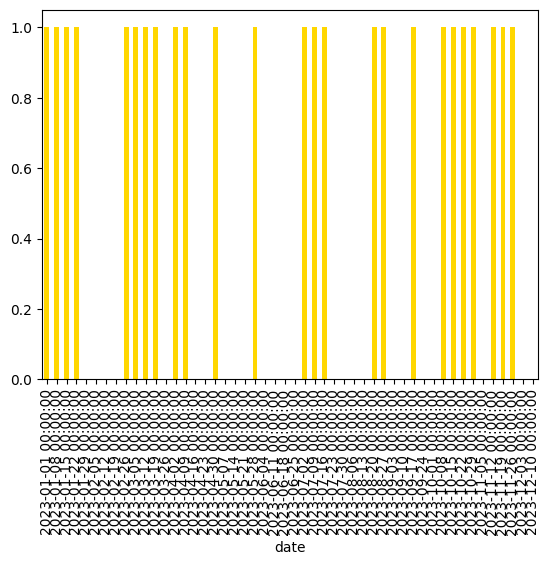

In [114]:
# from y_test, plot the bar chart that x-axis is date and y-axis is positive value
y_test.plot(kind='bar', color='gold')

In [115]:
y_train.value_counts()

1.0    266
0.0    254
Name: label, dtype: int64

### Logistic Regression

In [116]:
# Logistic Classification
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=0.003)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(C=0.003)

In [117]:
logreg.coef_

array([[ 0.06770932,  0.0038082 ,  0.02862628,  0.0009227 , -0.00237798,
        -0.01123378, -0.04976314,  0.01101413, -0.02257519,  0.01804655,
         0.08133134]])

In [118]:
pd.DataFrame(logreg.coef_, columns=X.columns)

,gold_close_rise,crudeoil_close_rise,ff_close_rise,dowjones_close_rise,nasdaq_close_rise,sp500_close_rise,usdthb_close_rise,usdcny_close_rise,usdaud_close_rise,usdrussia_close_rise,xau_close_rise
0,0.067709,0.003808,0.028626,0.000923,-0.002378,-0.011234,-0.049763,0.011014,-0.022575,0.018047,0.081331


In [119]:
# Make prediction
pred_train = logreg.predict(X_train_scaled)
pred_test = logreg.predict(X_test_scaled)

In [120]:
logreg.predict_proba(X_test_scaled)

array([[0.41827787, 0.58172213],
       [0.4502869 , 0.5497131 ],
       [0.44839493, 0.55160507],
       [0.47807854, 0.52192146],
       [0.43594143, 0.56405857],
       [0.55163275, 0.44836725],
       [0.53018831, 0.46981169],
       [0.52971914, 0.47028086],
       [0.53969735, 0.46030265],
       [0.47239308, 0.52760692],
       [0.50591713, 0.49408287],
       [0.43613796, 0.56386204],
       [0.42697596, 0.57302404],
       [0.47780607, 0.52219393],
       [0.41973172, 0.58026828],
       [0.47417484, 0.52582516],
       [0.54392999, 0.45607001],
       [0.52389393, 0.47610607],
       [0.45075315, 0.54924685],
       [0.50306173, 0.49693827],
       [0.53209249, 0.46790751],
       [0.55368939, 0.44631061],
       [0.51244411, 0.48755589],
       [0.4924366 , 0.5075634 ],
       [0.51011813, 0.48988187],
       [0.54675999, 0.45324001],
       [0.54496657, 0.45503343],
       [0.46526284, 0.53473716],
       [0.43395416, 0.56604584],
       [0.43406214, 0.56593786],
       [0.

In [121]:
from sklearn.metrics import classification_report

print(classification_report(y_train, pred_train))
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       0.59      0.54      0.56       254
         1.0       0.59      0.65      0.62       266

    accuracy                           0.59       520
   macro avg       0.59      0.59      0.59       520
weighted avg       0.59      0.59      0.59       520

              precision    recall  f1-score   support

         0.0       0.62      0.60      0.61        25
         1.0       0.62      0.64      0.63        25

    accuracy                           0.62        50
   macro avg       0.62      0.62      0.62        50
weighted avg       0.62      0.62      0.62        50



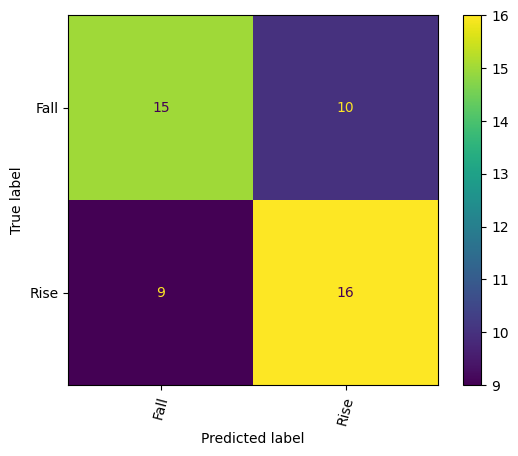

In [122]:
# Confusion matrix score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score, precision_score, f1_score, classification_report, RocCurveDisplay, make_scorer

cm = confusion_matrix(y_test, pred_test)
disp = ConfusionMatrixDisplay(cm, display_labels=['Fall', 'Rise'])
disp.plot(xticks_rotation=75)

In [123]:
# Feature importance Coefficients
logreg.coef_

array([[ 0.06770932,  0.0038082 ,  0.02862628,  0.0009227 , -0.00237798,
        -0.01123378, -0.04976314,  0.01101413, -0.02257519,  0.01804655,
         0.08133134]])

In [124]:
# Feature importance table
pd.DataFrame(np.exp(logreg.coef_), columns=X.columns).T

,0
gold_close_rise,1.070054
crudeoil_close_rise,1.003815
ff_close_rise,1.029040
dowjones_close_rise,1.000923
nasdaq_close_rise,0.997625
sp500_close_rise,0.988829
usdthb_close_rise,0.951455
usdcny_close_rise,1.011075
usdaud_close_rise,0.977678
usdrussia_close_rise,1.018210


<AxesSubplot: >

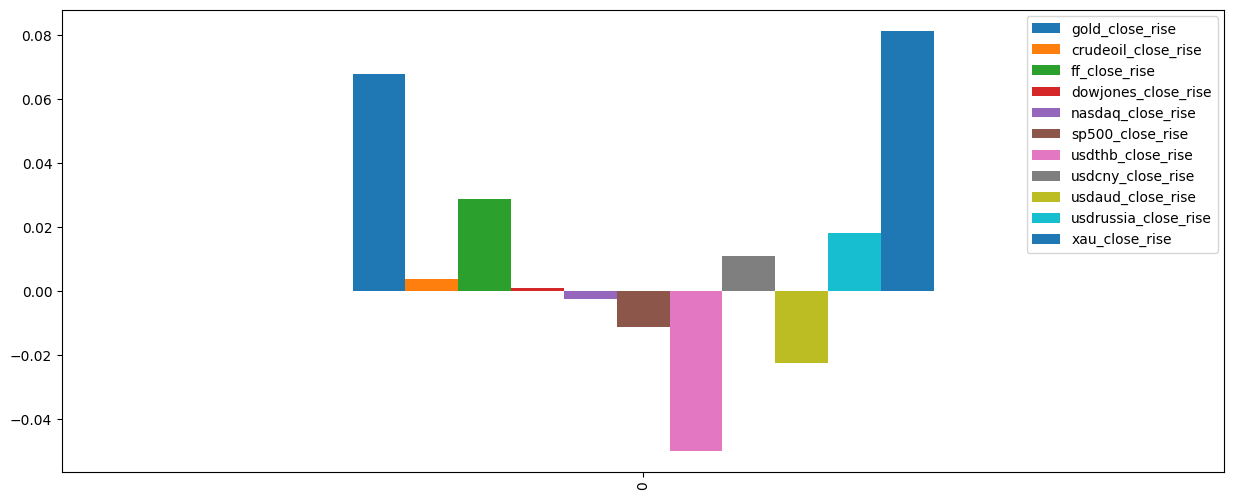

In [125]:
# Feature importance plot
pd.DataFrame(logreg.coef_, columns=X.columns).plot(kind='bar', figsize=(15, 6))

Cv score (accuracy): 0.573076923076923
Recall: 0.64


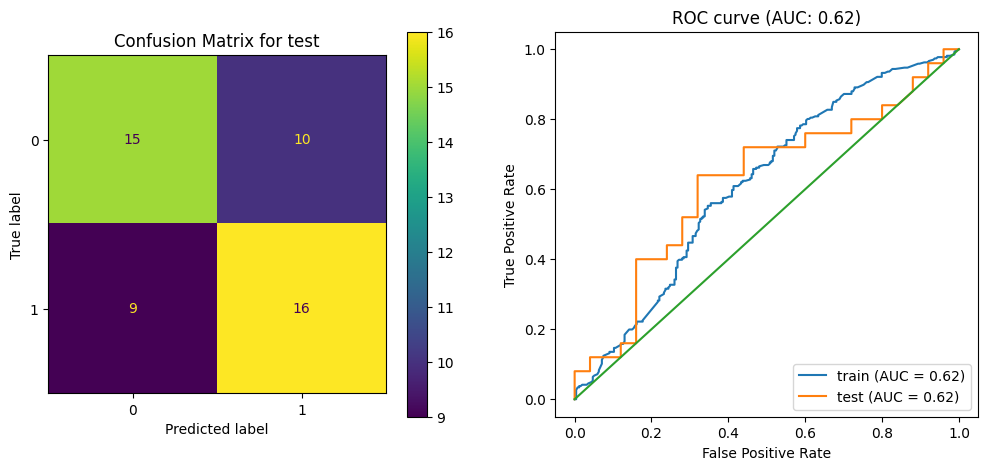

In [126]:
# Evaluate model
evaluate(logreg, X_train_scaled, X_test_scaled, y_train, y_test)

### Random Forest

In [127]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [128]:
# Make prediction
pred_train = rf.predict(X_train_scaled)
pred_test = rf.predict(X_test_scaled)

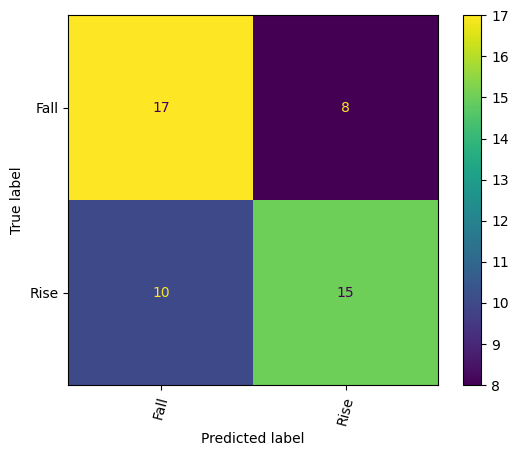

In [129]:
# Confusion matrix score
cm = confusion_matrix(y_test, pred_test)
disp = ConfusionMatrixDisplay(cm, display_labels=['Fall', 'Rise'])
disp.plot(xticks_rotation=75)

In [130]:
# Classification report
print(classification_report(y_train, pred_train))
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       0.81      0.86      0.83       254
         1.0       0.86      0.80      0.83       266

    accuracy                           0.83       520
   macro avg       0.83      0.83      0.83       520
weighted avg       0.83      0.83      0.83       520

              precision    recall  f1-score   support

         0.0       0.63      0.68      0.65        25
         1.0       0.65      0.60      0.63        25

    accuracy                           0.64        50
   macro avg       0.64      0.64      0.64        50
weighted avg       0.64      0.64      0.64        50



In [131]:
# Feature importance
pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

,Importance
usdcny_close_rise,0.115081
crudeoil_close_rise,0.113811
ff_close_rise,0.107687
usdrussia_close_rise,0.103926
xau_close_rise,0.098478
usdthb_close_rise,0.096305
usdaud_close_rise,0.091298
gold_close_rise,0.081514
nasdaq_close_rise,0.073486
dowjones_close_rise,0.072724


<AxesSubplot: >

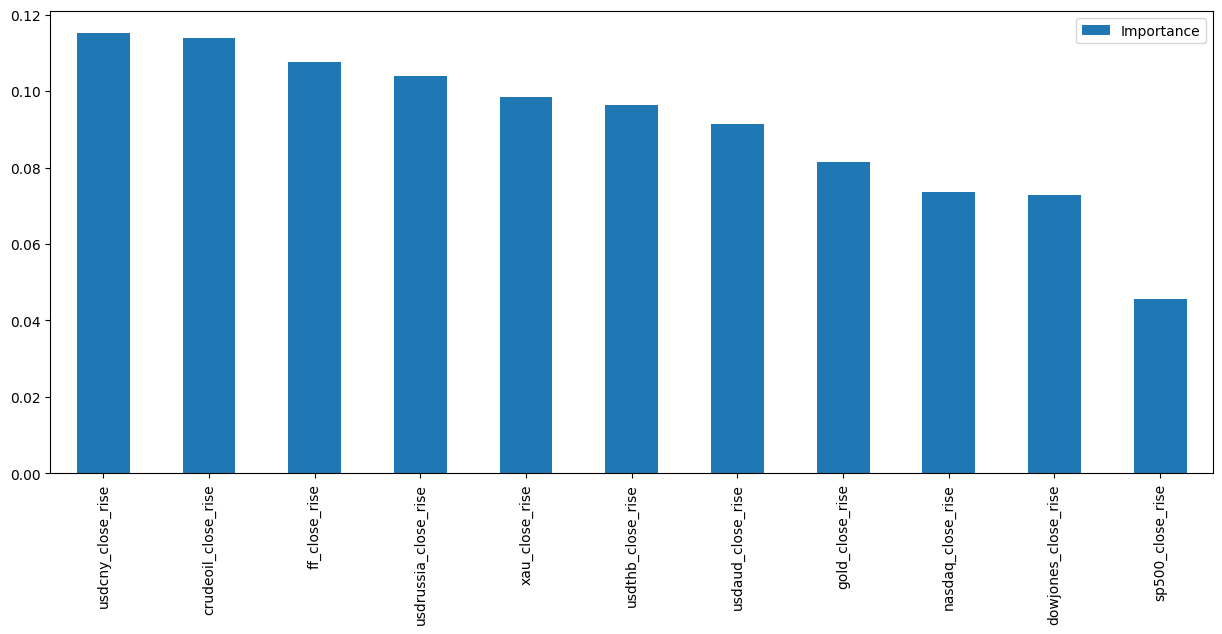

In [132]:
# Feature importance plot
pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False).plot(kind='bar', figsize=(15, 6))

Cv score (accuracy): 0.5288461538461539
Recall: 0.6


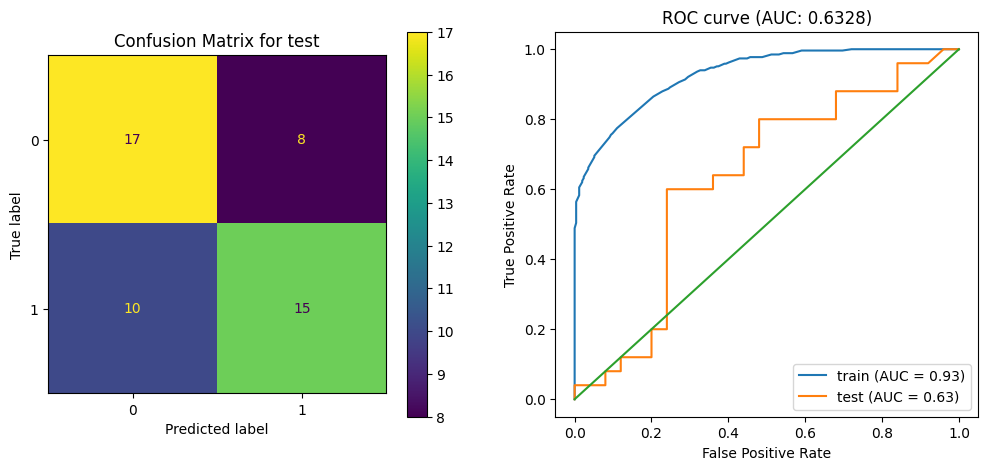

In [133]:
# Evaluate model
evaluate(rf, X_train_scaled, X_test_scaled, y_train, y_test)

## XGBoost

In [134]:
# XGBoost Classifier
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [135]:
xgb.get_xgb_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'eval_metric': None,
 'gamma': None,
 'grow_policy': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [136]:
# Make prediction
pred_train = xgb.predict(X_train_scaled)
pred_test = xgb.predict(X_test_scaled)

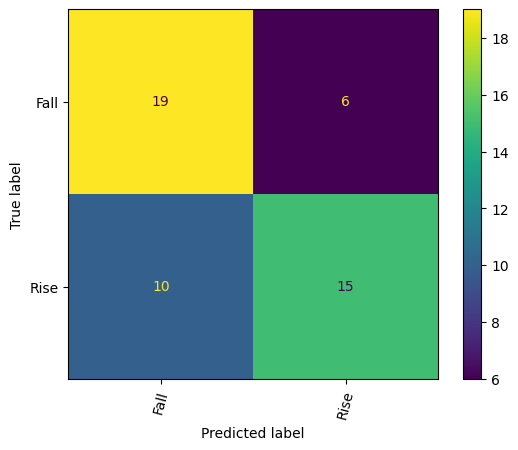

In [137]:
# Confusion matrix score
cm = confusion_matrix(y_test, pred_test)
disp = ConfusionMatrixDisplay(cm, display_labels=['Fall', 'Rise'])
disp.plot(xticks_rotation=75)

In [138]:
# Classification report
print(classification_report(y_train, pred_train))
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83       254
         1.0       0.85      0.81      0.83       266

    accuracy                           0.83       520
   macro avg       0.83      0.83      0.83       520
weighted avg       0.83      0.83      0.83       520

              precision    recall  f1-score   support

         0.0       0.66      0.76      0.70        25
         1.0       0.71      0.60      0.65        25

    accuracy                           0.68        50
   macro avg       0.68      0.68      0.68        50
weighted avg       0.68      0.68      0.68        50



In [139]:
# Feature importance
pd.DataFrame(xgb.feature_importances_, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

,Importance
xau_close_rise,0.132751
usdcny_close_rise,0.112717
crudeoil_close_rise,0.099885
dowjones_close_rise,0.099767
usdthb_close_rise,0.097123
sp500_close_rise,0.085091
ff_close_rise,0.081180
usdrussia_close_rise,0.077359
nasdaq_close_rise,0.076902
usdaud_close_rise,0.072678


<AxesSubplot: >

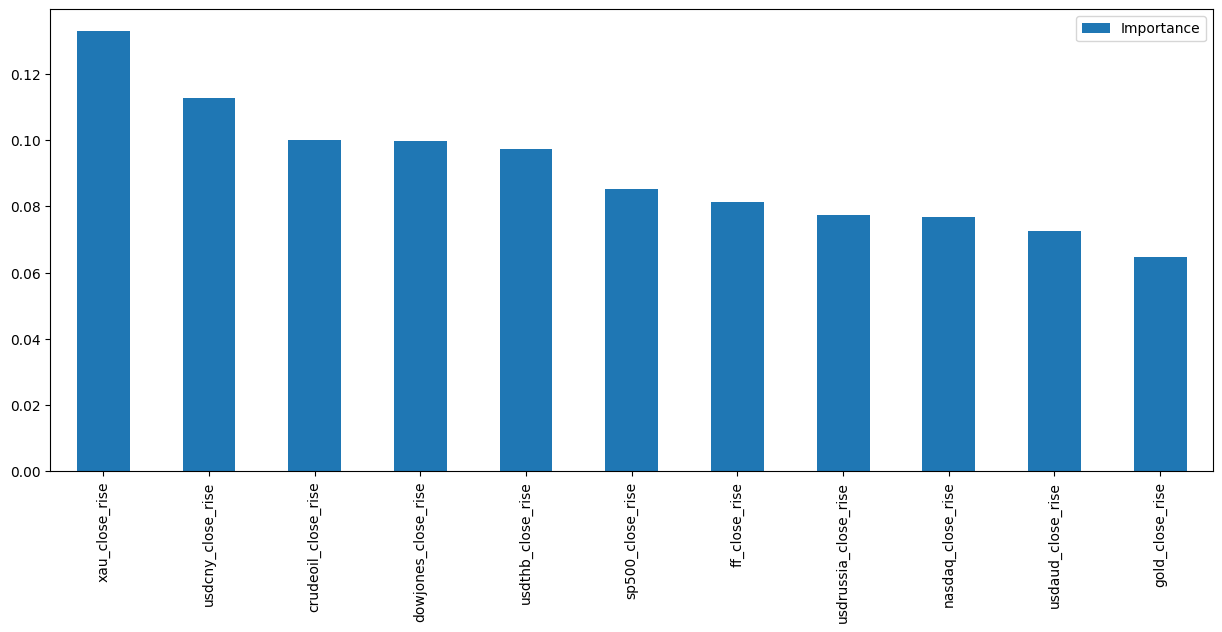

In [140]:
# Feature importance plot
pd.DataFrame(xgb.feature_importances_, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False).plot(kind='bar', figsize=(15, 6))

Cv score (accuracy): 0.5230769230769231
Recall: 0.6


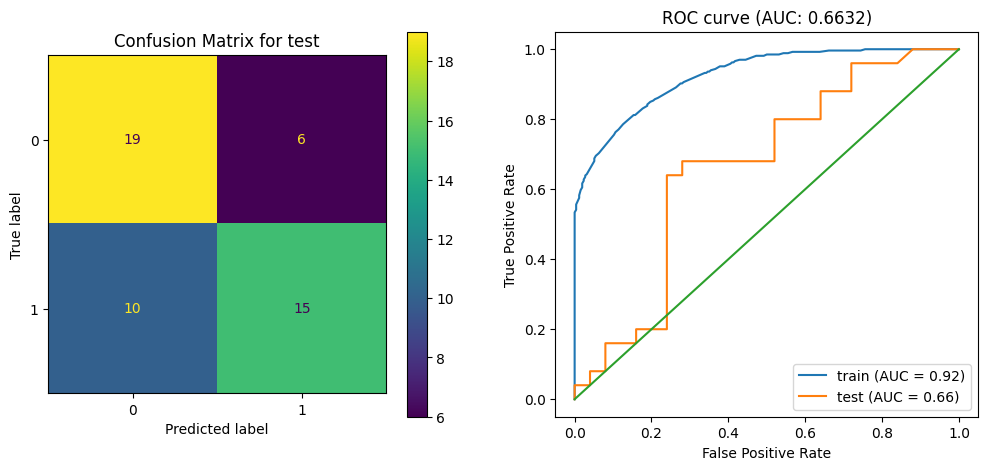

In [141]:
# Evaluate model
evaluate(xgb, X_train_scaled, X_test_scaled, y_train, y_test)

## XGBoost with GridSearch CV

In [142]:
# XGBoost Classifier with GridSearchCV
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier()
params = {'n_estimators': [100, 200, 300, 500],
          'max_depth': [1, 2, 3, 4, 5, 6],
          'learning_rate': [0.01, 0.1, 0.3]}
gs = GridSearchCV(xgb, params, cv=5, verbose=1)

gs.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'n_estimators': [100, 200, 300, 500]},
             verbose=1)

In [143]:
# Best parameters
gs.best_params_

{'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 200}

In [144]:
# Make prediction
pred_train = gs.predict(X_train_scaled)
pred_test = gs.predict(X_test_scaled)

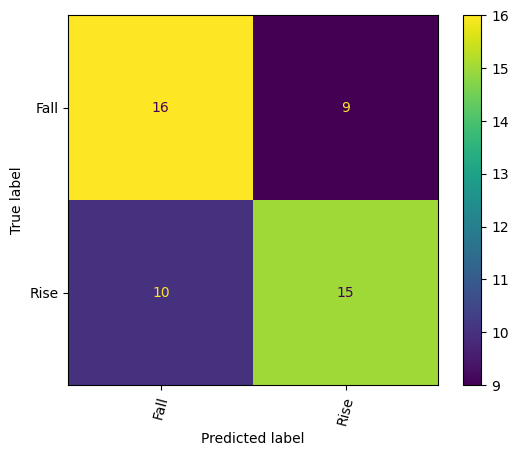

In [145]:
# Confusion matrix score
cm = confusion_matrix(y_test, pred_test)
disp = ConfusionMatrixDisplay(cm, display_labels=['Fall', 'Rise'])
disp.plot(xticks_rotation=75)

In [146]:
# Classification report
print(classification_report(y_train, pred_train))
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       0.60      0.57      0.58       254
         1.0       0.61      0.63      0.62       266

    accuracy                           0.60       520
   macro avg       0.60      0.60      0.60       520
weighted avg       0.60      0.60      0.60       520

              precision    recall  f1-score   support

         0.0       0.62      0.64      0.63        25
         1.0       0.62      0.60      0.61        25

    accuracy                           0.62        50
   macro avg       0.62      0.62      0.62        50
weighted avg       0.62      0.62      0.62        50



In [147]:
# Feature importance
pd.DataFrame(gs.best_estimator_.feature_importances_, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

,Importance
xau_close_rise,0.486548
gold_close_rise,0.271959
usdthb_close_rise,0.154324
ff_close_rise,0.087168
crudeoil_close_rise,0.000000
dowjones_close_rise,0.000000
nasdaq_close_rise,0.000000
sp500_close_rise,0.000000
usdcny_close_rise,0.000000
usdaud_close_rise,0.000000


# Limitation
I found gold price data which is daily data from year 2013 til the end of month in Year 2012. It found out that when I used autocorrelation plot which showed there are not correlate the price and percentage change of price that I will forcast. Thus, I will move to machine learning to apply with gold price prediction instead.

When I used weekly gold data, it seems not good fit to use ARIMA model.